In [239]:
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/

In [240]:
#! chmod 600 ~/.kaggle/kaggle.json

In [241]:
#!pip install kaggle
#!kaggle datasets download -d mlg-ulb/creditcardfraud

In [242]:
#! mkdir data
#! unzip creditcardfraud.zip -d data
#! pip install catboost

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,f1_score,recall_score,roc_auc_score, roc_curve, precision_score
from matplotlib import rc,rcParams
import itertools
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [244]:
# Set the number of rows to be loaded from the dataset
num_rows = 2000
def load_application_train():
    data = pd.read_csv("creditcard.csv")
    return data

df = load_application_train()




In [245]:
df_fraud = df[df["Class"]==1]

In [246]:
len(df_fraud)

492

In [247]:
df_fraud.head()

Time     V1     V2     V3    V4     V5     V6     V7     V8     V9  \
541   406.000 -2.312  1.952 -1.610 3.998 -0.522 -1.427 -2.537  1.392 -2.770   
623   472.000 -3.044 -3.157  1.088 2.289  1.360 -1.065  0.326 -0.068 -0.271   
4920 4462.000 -2.303  1.759 -0.360 2.330 -0.822 -0.076  0.562 -0.399 -0.238   
6108 6986.000 -4.398  1.358 -2.593 2.680 -1.128 -1.707 -3.496 -0.249 -0.248   
6329 7519.000  1.234  3.020 -4.305 4.733  3.624 -1.358  1.713 -0.496 -1.283   

        V10    V11     V12    V13    V14    V15    V16     V17    V18    V19  \
541  -2.772  3.202  -2.900 -0.595 -4.289  0.390 -1.141  -2.830 -0.017  0.417   
623  -0.839 -0.415  -0.503  0.677 -1.692  2.001  0.667   0.600  1.725  0.283   
4920 -1.525  2.033  -6.560  0.023 -1.470 -0.699 -2.282  -4.782 -2.616 -1.334   
6108 -4.802  4.896 -10.913  0.184 -6.771 -0.007 -7.358 -12.598 -5.132  0.308   
6329 -2.447  2.101  -4.610  1.464 -6.079 -0.339  2.582   6.739  3.042 -2.722   

        V20    V21    V22    V23    V24    V25    V26    V27    V28  Amount  \
541   0.127  0.517 -0.035 -0.465  0.320  0.045  0.178  0.261 -0.143   0.000   
623   2.102  0.662  0.435  1.376 -0.294  0.280 -0.145 -0.253  0.036 529.000   
4920 -0.430 -0.294 -0.932  0.173 -0.087 -0.156 -0.543  0.040 -0.153 239.930   
6108 -0.172  0.574  0.177 -0.436 -0.054  0.252 -0.657 -0.827  0.850  59.000   
6329  0.009 -0.379 -0.704 -0.657 -1.633  1.489  0.567 -0.010  0.147   1.000   

      Class  
541       1  
623       1  
4920      1  
6108      1  
6329      1

In [248]:
# Sample a specified number of rows from the DataFrame with a given random state
df_sample = df.sample(n=num_rows, random_state=3)

In [249]:
len(df_sample)

2000

In [250]:
len(df_sample[df_sample["Class"]==1])

2

In [251]:
df_non_fraud = df_sample[df_sample["Class"]==0]

In [252]:
len(df_non_fraud)

1998

In [253]:
frames = [df_fraud, df_non_fraud]

df = pd.concat(frames)

In [254]:
df.head()

Time     V1     V2     V3    V4     V5     V6     V7     V8     V9  \
541   406.000 -2.312  1.952 -1.610 3.998 -0.522 -1.427 -2.537  1.392 -2.770   
623   472.000 -3.044 -3.157  1.088 2.289  1.360 -1.065  0.326 -0.068 -0.271   
4920 4462.000 -2.303  1.759 -0.360 2.330 -0.822 -0.076  0.562 -0.399 -0.238   
6108 6986.000 -4.398  1.358 -2.593 2.680 -1.128 -1.707 -3.496 -0.249 -0.248   
6329 7519.000  1.234  3.020 -4.305 4.733  3.624 -1.358  1.713 -0.496 -1.283   

        V10    V11     V12    V13    V14    V15    V16     V17    V18    V19  \
541  -2.772  3.202  -2.900 -0.595 -4.289  0.390 -1.141  -2.830 -0.017  0.417   
623  -0.839 -0.415  -0.503  0.677 -1.692  2.001  0.667   0.600  1.725  0.283   
4920 -1.525  2.033  -6.560  0.023 -1.470 -0.699 -2.282  -4.782 -2.616 -1.334   
6108 -4.802  4.896 -10.913  0.184 -6.771 -0.007 -7.358 -12.598 -5.132  0.308   
6329 -2.447  2.101  -4.610  1.464 -6.079 -0.339  2.582   6.739  3.042 -2.722   

        V20    V21    V22    V23    V24    V25    V26    V27    V28  Amount  \
541   0.127  0.517 -0.035 -0.465  0.320  0.045  0.178  0.261 -0.143   0.000   
623   2.102  0.662  0.435  1.376 -0.294  0.280 -0.145 -0.253  0.036 529.000   
4920 -0.430 -0.294 -0.932  0.173 -0.087 -0.156 -0.543  0.040 -0.153 239.930   
6108 -0.172  0.574  0.177 -0.436 -0.054  0.252 -0.657 -0.827  0.850  59.000   
6329  0.009 -0.379 -0.704 -0.657 -1.633  1.489  0.567 -0.010  0.147   1.000   

      Class  
541       1  
623       1  
4920      1  
6108      1  
6329      1

In [255]:
# Shuffle the DataFrame
df = df.sample(frac=1, random_state = 42).reset_index(drop=True)

In [256]:
df.head(100)

Time      V1     V2      V3     V4      V5     V6      V7     V8  \
0   48083.000  -0.799  1.175   0.825  0.136   0.047 -0.509   0.680  0.347   
1  160895.000  -0.848  2.720  -6.199  3.044  -3.302 -1.992  -3.735  1.520   
2  162897.000   2.334 -1.192  -1.511 -1.769  -0.835 -0.954  -0.750 -0.216   
3  147501.000  -1.612 -0.408  -3.830  6.249  -3.361  1.148   1.858  0.475   
4   11110.000   0.884 -0.428   1.509  1.001  -1.197 -0.030  -0.755  0.046   
5   60753.000   1.141  0.244   0.884  1.138  -0.528 -0.478  -0.138  0.002   
6   64125.000  -1.303  0.359   3.712  3.373  -0.575  1.093  -1.029  0.289   
7   27053.000   1.543 -1.354  -0.780 -2.490   0.684  3.458  -1.822  0.854   
8  153325.000  -0.198  0.778  -1.683 -0.402   0.551 -0.667   1.297  0.190   
9   45964.000   1.348 -0.235  -1.242 -1.243   1.904  3.105  -0.598  0.762   
10 130266.000  -0.235  1.146  -0.484 -0.337   0.171 -1.242   0.651  0.193   
11  69864.000   1.082 -0.259   1.340  1.593  -0.838  0.784  -0.754  0.366   
12  41436.000   1.309 -1.811   1.110 -0.829  -2.194  0.368  -1.693  0.223   
13 142961.000   0.458  1.374  -0.489  2.805   1.777  0.100   1.295 -0.136   
14  44495.000   0.550 -1.374   0.820  0.423  -1.065  0.997  -0.581  0.446   
15  76857.000   1.140  1.156  -1.472  2.076   0.775 -1.003   0.265  0.013   
16 153761.000   1.146  1.403  -4.159  2.660  -0.323 -1.836  -1.624  0.260   
17  65411.000   1.168  0.176   0.874  1.204  -0.829 -0.966  -0.135 -0.066   
18  36881.000  -2.161  1.293   1.668 -0.100  -0.930  1.245   0.810 -0.131   
19  51257.000   1.263  0.193   0.087  0.940  -0.080 -0.440   0.042 -0.080   
20  75581.000  -2.866  2.347  -4.053  3.983  -3.463 -1.281  -4.475  1.217   
21  82764.000  -0.275  0.676   0.116 -1.241   2.583  3.409   0.344  0.716   
22  51436.000   1.121 -0.851   1.631  0.638  -1.651  0.644  -1.414  0.561   
23  80956.000  -1.586  1.115   1.299 -1.740  -1.471 -1.341  -0.499  0.853   
24 134766.000  -0.080  3.222  -3.724  6.037   0.583 -0.691  -1.800 -2.628   
25 156264.000   1.965 -0.506  -0.881  0.219  -0.377 -0.560  -0.260 -0.080   
26 152164.000   2.011 -0.166  -1.997  0.387   0.215 -1.626   0.728 -0.536   
27 167936.000   1.892 -0.965   0.832  1.046  -1.612  0.540  -1.574  0.383   
28 126116.000  -0.034  0.814   0.098 -1.023   1.588 -0.746   1.463 -0.631   
29 148654.000  -0.292  1.186  -0.481 -0.364   0.402 -1.002   0.699  0.185   
30 146622.000  -0.205  0.495  -0.610 -2.267   1.222 -1.981   1.939 -0.708   
31  25818.000  -1.156 -1.039   0.722 -3.570   1.892  3.195  -1.156  0.716   
32 129086.000  -1.009  0.758   0.887 -0.921   0.324  1.184   0.218  0.784   
33  13202.000  -0.580  1.114   1.917  0.920   0.705 -0.106   0.950 -0.665   
34 121167.000  -1.291 -0.085   0.821 -2.461  -0.369 -0.509  -0.150  0.753   
35  11269.000  -1.511  0.908   0.579  3.858   2.562  4.757  -0.816  1.417   
36  72443.000   1.272  0.255  -0.057  1.143  -0.023 -0.630   0.251 -0.165   
37  41116.000  -3.601  4.519  -6.341  6.215  -5.830 -2.478  -9.938  2.830   
38 116660.000   2.019  0.173  -1.587  0.338   0.457 -0.644   0.144 -0.149   
39  54561.000  -0.790  0.627   0.718  0.189  -0.397  0.135   0.663  0.375   
40 145830.000  -0.760  0.935   2.198 -0.498   0.067 -0.266   0.716 -0.177   
41  79263.000   1.177 -0.599   1.323  0.617  -1.214  0.674  -1.158  0.371   
42 117571.000  -0.635 -0.271   1.657 -3.207  -0.567 -0.034  -0.331  0.211   
43 171194.000  -1.513  1.517  -0.176  0.852   0.659 -0.328   0.567  0.715   
44  42254.000  -1.216  0.398   1.634 -0.046   1.059  1.713   0.423  0.662   
45 165299.000  -0.157  1.265   0.768  2.843   1.094 -0.007   1.666 -0.435   
46  77403.000  -1.974 -1.109   0.390 -0.617   3.034  3.215   0.202  1.021   
47 154787.000   2.204 -0.788  -1.438 -0.288  -0.379 -0.424  -0.477 -0.144   
48 132174.000  -0.653 -0.556   1.165 -1.137  -1.159  0.347  -0.961  0.706   
49 138027.000  -0.307  0.714  -0.081 -0.064   0.695 -0.725   1.114 -0.412   
50 110344.000   1.849  0.663   0.024  4.357  -0.063 -0.582   0.117 -0.294   
51  6

## Data Preprocessing

In [257]:
def check_df(dataframe, head = 5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.head(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.95, 0.99, 1]).T)

In [258]:
check_df(df)

##################### Shape #####################
(2490, 31)
##################### Types #####################
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
##################### Head #####################
        Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0  48083.000 -0.799  1.175  0.825  0.136  0.047 -0.509  0.680  0.347 -1.362   
1 160895.000 -0.848  2.720 -6.199  3.044 -3.302 -1.992 -3.735  1.520 -2.549   
2 162897.000  2.334 -1.192 -1.5

In [259]:
def grab_col_names(dataframe, categorical_threshold = 10, cardinal_threshold = 20):
    """

    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included.

    Parameters
    ------
        dataframe: dataframe
                Dataframe from which variable names are to be taken
        cat_th: int, optional
                Class threshold value for variables that are numeric but categorical
        car_th: int, optinal
                Class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numerical variable list
        cat_but_car: list
                List of cardinal variables with categorical view

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 lists that return equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """
    categorical_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]

    # Numerical columns that behave like categorical based on the threshold categorical_threshold
    numeric_looking_but_categorical = [col for col in dataframe.columns if dataframe[col].dtype != "O" and dataframe[col].nunique() < categorical_threshold]

    # Categorical columns that behave like numerical based on the threshold cardinal_threshold
    categorical_looking_but_cardinal = [col for col in dataframe.columns  if dataframe[col].dtype == "O" and dataframe[col].nunique() > cardinal_threshold]

    categorical_cols = categorical_cols + numeric_looking_but_categorical

    categorical_cols = [col for col in categorical_cols if col not in categorical_looking_but_cardinal]

    numeric_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]

    numeric_cols = [col for col in numeric_cols if col not in numeric_looking_but_categorical]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"Categorical Columns: {len(categorical_cols)}")
    print(f"Numeric Columns: {len(numeric_cols)}")
    print(f"Categorical Looking but Cardinal: {len(categorical_looking_but_cardinal)}")
    print(f"Numeric Looking but Categorical: {len(numeric_looking_but_categorical)}")
    return categorical_cols, numeric_cols, categorical_looking_but_cardinal

In [260]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 2490
Variables: 31
Categorical Columns: 1
Numeric Columns: 30
Categorical Looking but Cardinal: 0
Numeric Looking but Categorical: 1


In [261]:
cat_cols

['Class']

In [262]:
num_cols

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [263]:
cat_but_car

[]

In [264]:
df.describe().T

count      mean       std     min       25%       50%        75%  \
Time   2490.000 92403.400 47510.911  51.000 51476.000 83709.000 138019.250   
V1     2490.000    -0.922     3.956 -30.552    -1.386    -0.282      1.243   
V2     2490.000     0.717     2.774 -20.459    -0.437     0.285      1.195   
V3     2490.000    -1.404     4.415 -31.104    -1.665    -0.253      0.789   
V4     2490.000     0.894     2.515  -4.313    -0.631     0.332      1.429   
V5     2490.000    -0.628     2.977 -22.106    -0.962    -0.211      0.574   
V6     2490.000    -0.297     1.549  -8.998    -0.992    -0.410      0.261   
V7     2490.000    -1.092     4.046 -43.557    -0.954    -0.112      0.499   
V8     2490.000     0.122     3.184 -41.044    -0.208     0.047      0.484   
V9     2490.000    -0.513     1.786 -13.434    -1.076    -0.214      0.456   
V10    2490.000    -1.119     3.254 -24.588    -0.971    -0.224      0.268   
V11    2490.000     0.708     2.136  -3.549    -0.675     0.206      1.262   
V12    2490.000    -1.259     3.335 -18.684    -1.127    -0.104      0.455   
V13    2490.000    -0.048     1.017  -3.750    -0.742    -0.038      0.637   
V14    2490.000    -1.345     3.465 -19.214    -0.964    -0.133      0.398   
V15    2490.000     0.010     0.931  -4.499    -0.551     0.081      0.663   
V16    2490.000    -0.790     2.507 -14.130    -0.947    -0.065      0.462   
V17    2490.000    -1.303     4.131 -25.163    -0.718    -0.167      0.363   
V18    2490.000    -0.450     1.730  -9.499    -0.757    -0.116      0.418   
V19    2490.000     0.132     1.029  -3.682    -0.447     0.052      0.614   
V20    2490.000     0.070     0.865  -7.972    -0.212    -0.042      0.205   
V21    2490.000     0.148     1.848 -22.798    -0.216     0.004      0.292   
V22    2490.000    -0.006     0.926  -8.887    -0.564    -0.006      0.538   
V23    2490.000    -0.017     0.887 -19.254    -0.174    -0.014      0.168   
V24    2490.000    -0.008     0.597  -2.144    -0.366     0.035      0.421   
V25    2490.000     0.005     0.567  -4.782    -0.325     0.011      0.354   
V26    2490.000     0.008     0.472  -1.312    -0.307    -0.039      0.260   
V27    2490.000     0.023     0.722  -7.263    -0.069     0.017      0.186   
V28    2490.000     0.014     0.348  -2.926    -0.053     0.017      0.113   
Amount 2490.000    95.780   269.029   0.000     2.913    19.730     81.703   
Class  2490.000     0.198     0.398   0.000     0.000     0.000      0.000   

              max  
Time   172756.000  
V1          2.371  
V2         22.058  
V3          4.029  
V4         12.115  
V5         12.478  
V6         12.059  
V7         16.334  
V8         20.007  
V9          6.264  
V10        11.094  
V11        12.019  
V12         3.426  
V13         3.575  
V14         5.701  
V15         2.737  
V16         3.595  
V17         6.739  
V18         3.790  
V19         5.228  
V20        11.059  
V21        27.203  
V22         8.362  
V23         6.992  
V24         3.957  
V25         2.610  
V26         2.745  
V27         3.052  
V28         4.748  
Amount   4350.000  
Class       1.000

## Analyzing the numerical and categorical variables.

In [265]:
def categorical_summary(dataframe, col_name, plot = False):
    # Display value counts and ratios in a DataFrame
    print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                       "Ratio" : dataframe[col_name].value_counts()/ len(dataframe)}))

    # Generate a count plot if plot is True
    if plot:
        plt.figure(figsize=(8,6))
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block=True)

   Class  Ratio
0   1998  0.802
1    492  0.198


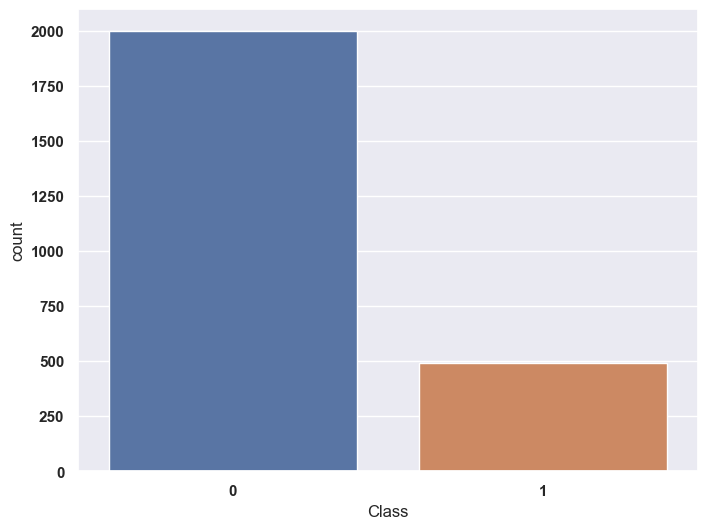

In [266]:
for col in cat_cols:
    categorical_summary(df, col, True)

In [267]:
def numerical_summary(dataframe, col_name, plot = False):
    # Define quantiles for detailed description
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)

    if plot:
        plt.figure(figsize=(8,6))
        dataframe[col_name].hist(bins = 20)
        plt.title(col_name)
        plt.xlabel(col_name)
        plt.show()

count     2490.000
mean     92403.400
std      47510.911
min         51.000
5%       20243.600
10%      32975.800
20%      45311.000
30%      58127.900
40%      70852.800
50%      83709.000
60%     114342.400
70%     131546.200
80%     144249.000
90%     155286.200
95%     162801.100
99%     169779.990
max     172756.000
Name: Time, dtype: float64


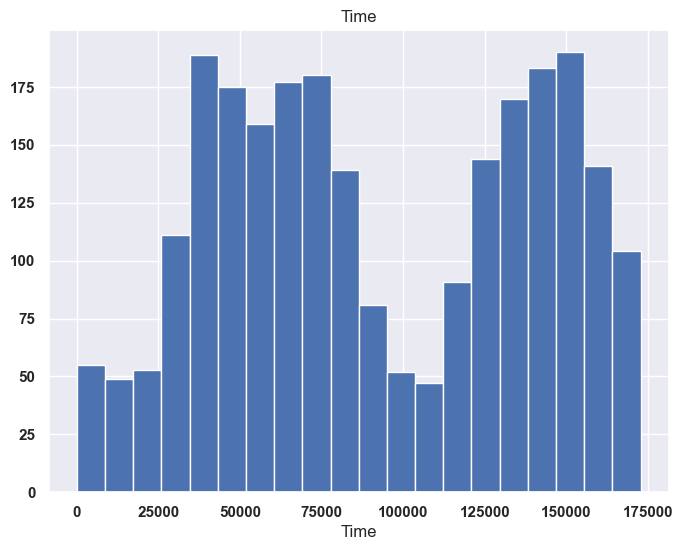

count   2490.000
mean      -0.922
std        3.956
min      -30.552
5%        -7.030
10%       -3.771
20%       -1.781
30%       -1.104
40%       -0.670
50%       -0.282
60%        0.469
70%        1.163
80%        1.383
90%        1.983
95%        2.069
99%        2.227
max        2.371
Name: V1, dtype: float64


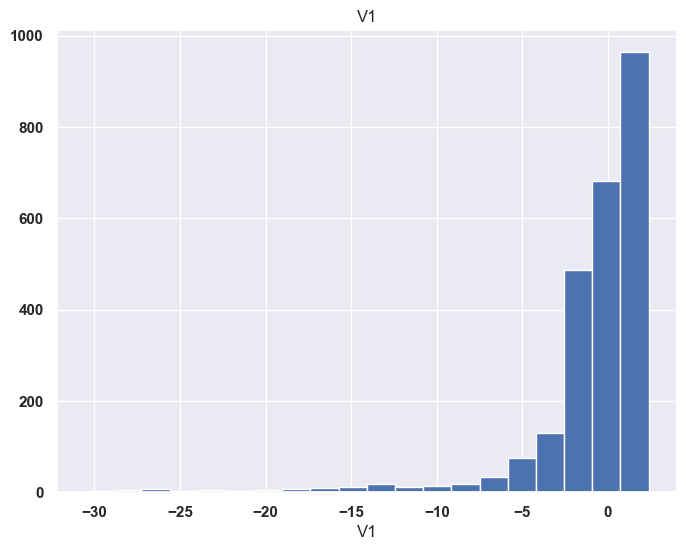

count   2490.000
mean       0.717
std        2.774
min      -20.459
5%        -1.845
10%       -1.207
20%       -0.680
30%       -0.282
40%        0.009
50%        0.285
60%        0.687
70%        1.042
80%        1.442
90%        3.022
95%        5.155
99%       12.786
max       22.058
Name: V2, dtype: float64


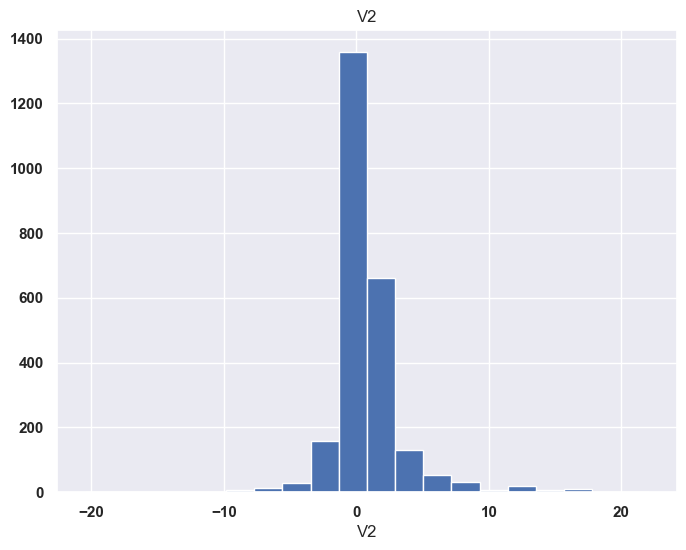

count   2490.000
mean      -1.404
std        4.415
min      -31.104
5%        -8.658
10%       -5.301
20%       -2.156
30%       -1.325
40%       -0.671
50%       -0.253
60%        0.164
70%        0.579
80%        1.017
90%        1.544
95%        1.896
99%        2.627
max        4.029
Name: V3, dtype: float64


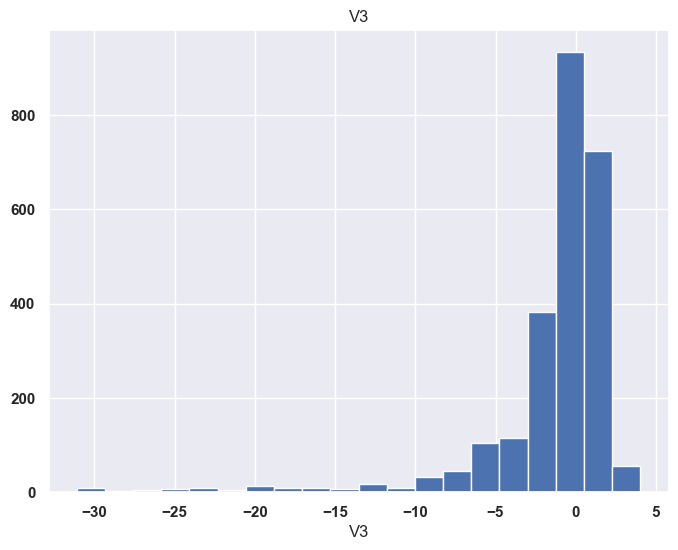

count   2490.000
mean       0.894
std        2.515
min       -4.313
5%        -1.869
10%       -1.476
20%       -0.825
30%       -0.465
40%       -0.021
50%        0.332
60%        0.644
70%        1.166
80%        2.076
90%        4.304
95%        6.336
99%       10.263
max       12.115
Name: V4, dtype: float64


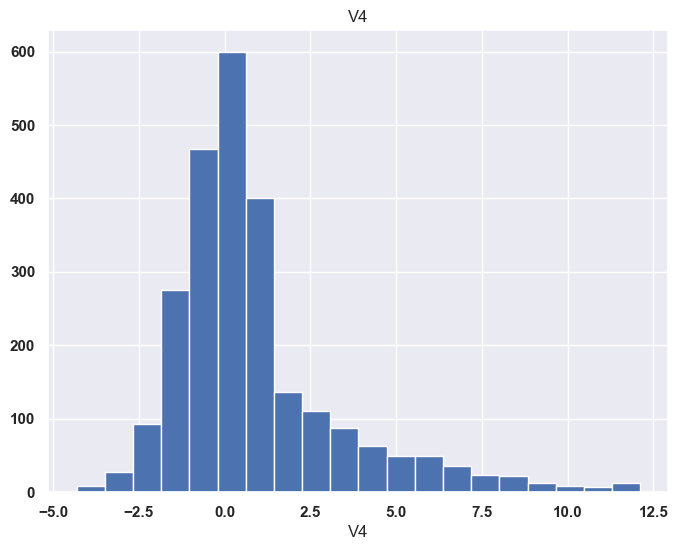

count   2490.000
mean      -0.628
std        2.977
min      -22.106
5%        -5.061
10%       -2.100
20%       -1.185
30%       -0.775
40%       -0.463
50%       -0.211
60%        0.083
70%        0.396
80%        0.776
90%        1.411
95%        2.225
99%        4.054
max       12.478
Name: V5, dtype: float64


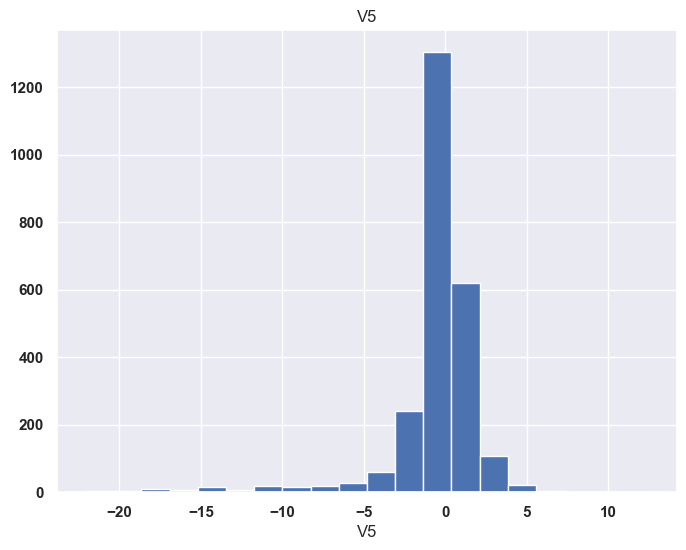

count   2490.000
mean      -0.297
std        1.549
min       -8.998
5%        -2.690
10%       -1.797
20%       -1.182
30%       -0.835
40%       -0.611
50%       -0.410
60%       -0.174
70%        0.094
80%        0.491
90%        1.247
95%        3.027
99%        4.285
max       12.059
Name: V6, dtype: float64


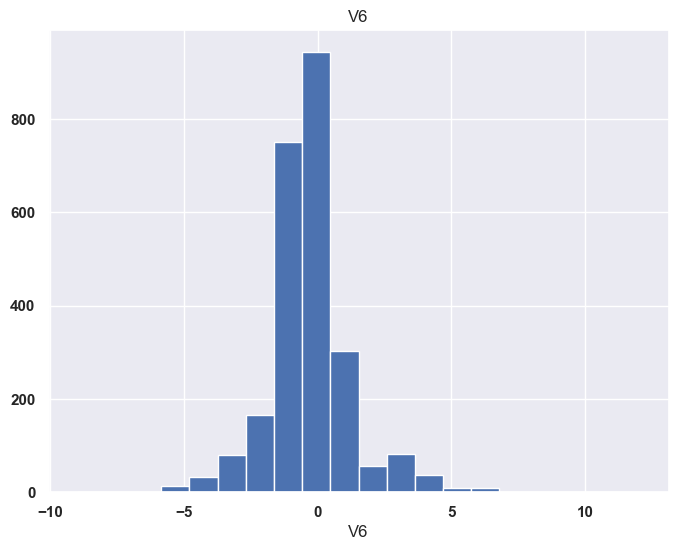

count   2490.000
mean      -1.092
std        4.046
min      -43.557
5%        -8.102
10%       -3.307
20%       -1.212
30%       -0.747
40%       -0.438
50%       -0.112
60%        0.097
70%        0.315
80%        0.613
90%        0.995
95%        1.433
99%        2.773
max       16.334
Name: V7, dtype: float64


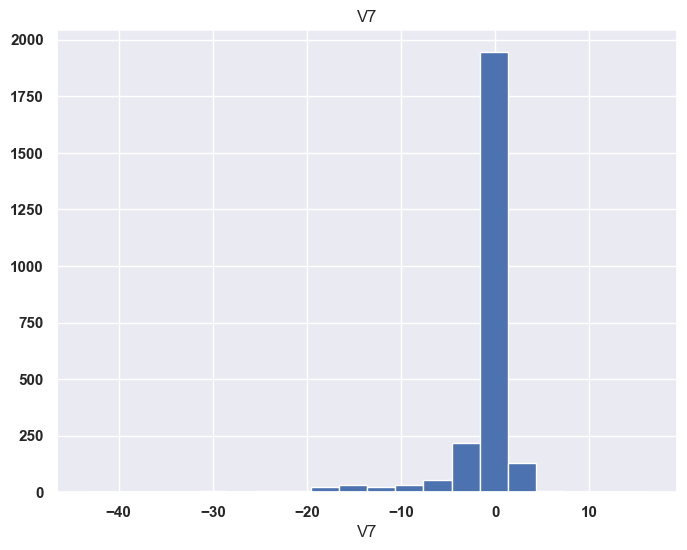

count   2490.000
mean       0.122
std        3.184
min      -41.044
5%        -1.578
10%       -0.536
20%       -0.271
30%       -0.148
40%       -0.045
50%        0.047
60%        0.174
70%        0.353
80%        0.643
90%        1.168
95%        2.081
99%        8.838
max       20.007
Name: V8, dtype: float64


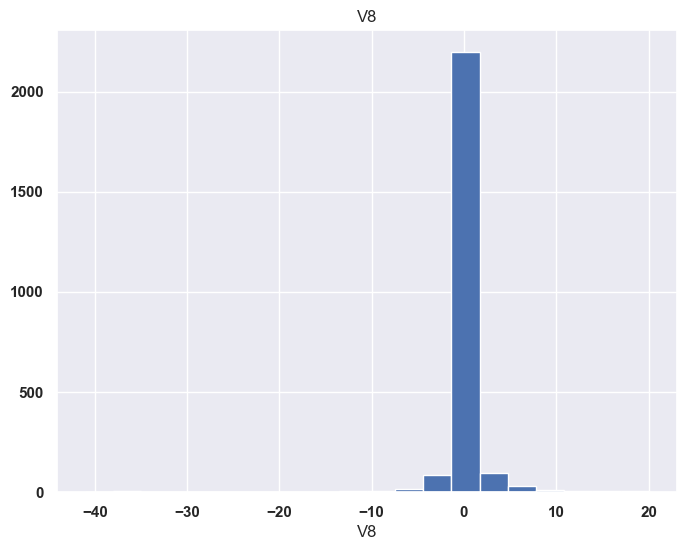

count   2490.000
mean      -0.513
std        1.786
min      -13.434
5%        -3.858
10%       -2.425
20%       -1.383
30%       -0.832
40%       -0.493
50%       -0.214
60%        0.005
70%        0.291
80%        0.644
90%        1.211
95%        1.637
99%        2.660
max        6.264
Name: V9, dtype: float64


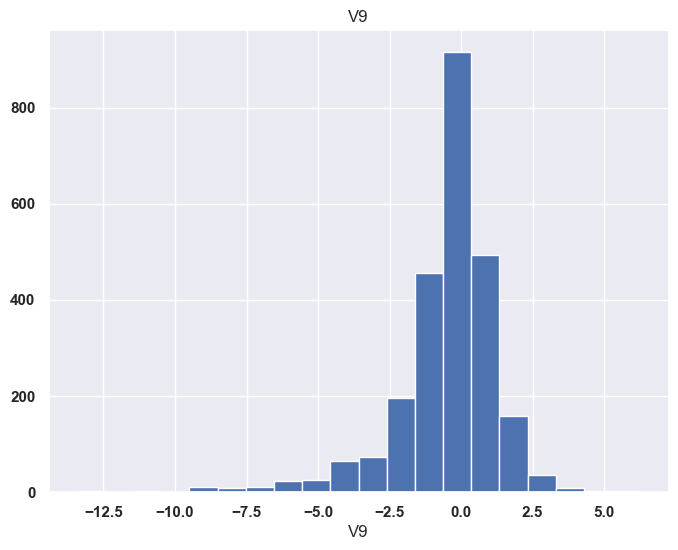

count   2490.000
mean      -1.119
std        3.254
min      -24.588
5%        -7.661
10%       -4.549
20%       -1.348
30%       -0.764
40%       -0.450
50%       -0.224
60%       -0.058
70%        0.135
80%        0.490
90%        0.979
95%        1.465
99%        2.767
max       11.094
Name: V10, dtype: float64


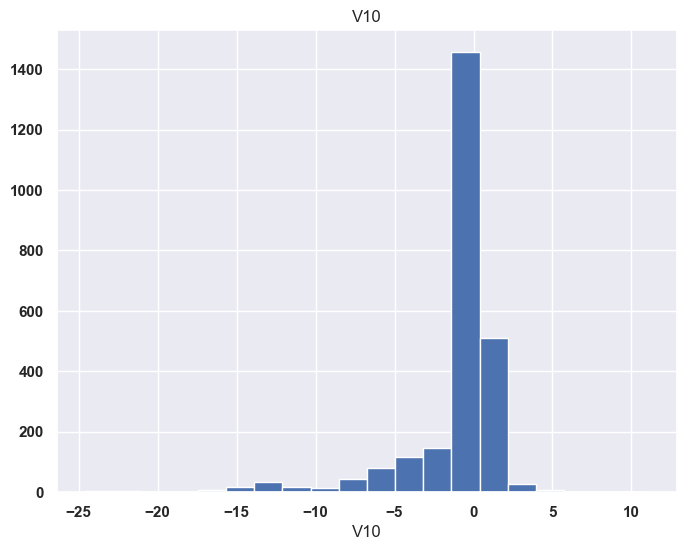

count   2490.000
mean       0.708
std        2.136
min       -3.549
5%        -1.482
10%       -1.224
20%       -0.807
30%       -0.497
40%       -0.133
50%        0.206
60%        0.609
70%        1.028
80%        1.564
90%        3.555
95%        5.272
99%        8.791
max       12.019
Name: V11, dtype: float64


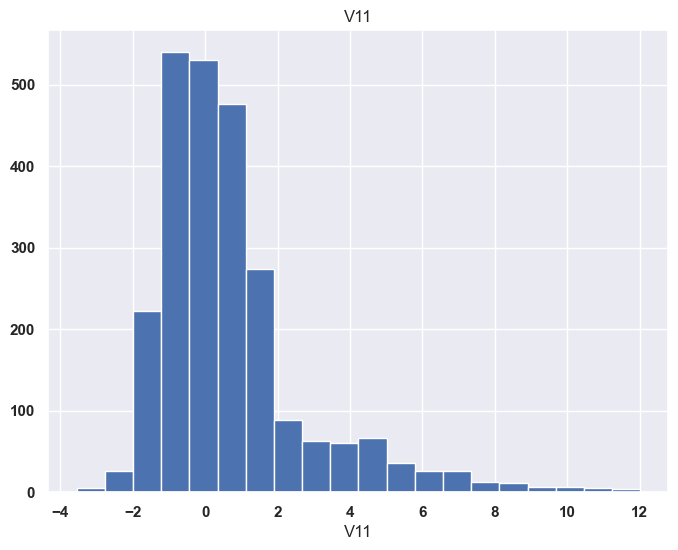

count   2490.000
mean      -1.259
std        3.335
min      -18.684
5%        -8.681
10%       -5.439
20%       -2.030
30%       -0.789
40%       -0.368
50%       -0.104
60%        0.109
70%        0.329
80%        0.564
90%        0.922
95%        1.172
99%        1.601
max        3.426
Name: V12, dtype: float64


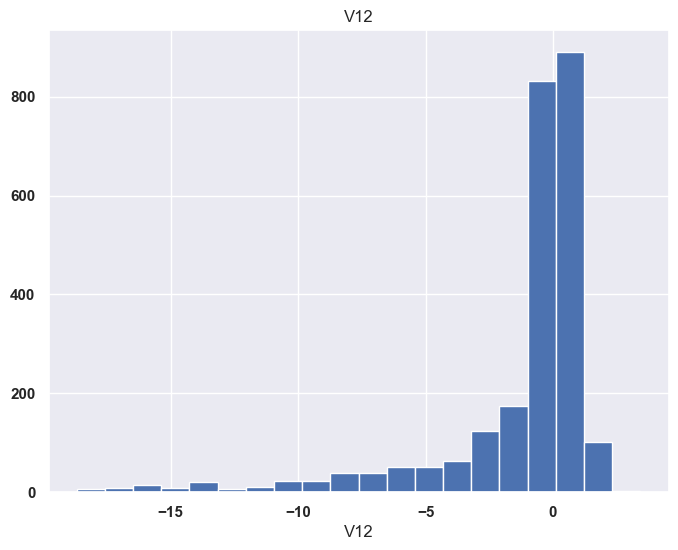

count   2490.000
mean      -0.048
std        1.017
min       -3.750
5%        -1.726
10%       -1.372
20%       -0.919
30%       -0.561
40%       -0.277
50%       -0.038
60%        0.210
70%        0.498
80%        0.820
90%        1.236
95%        1.589
99%        2.362
max        3.575
Name: V13, dtype: float64


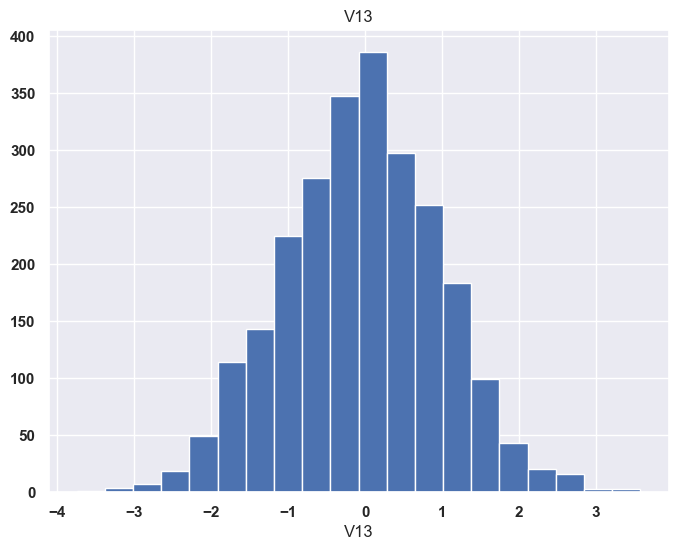

count   2490.000
mean      -1.345
std        3.465
min      -19.214
5%        -9.609
10%       -6.667
20%       -1.536
30%       -0.716
40%       -0.359
50%       -0.133
60%        0.086
70%        0.282
80%        0.502
90%        0.850
95%        1.328
99%        1.990
max        5.701
Name: V14, dtype: float64


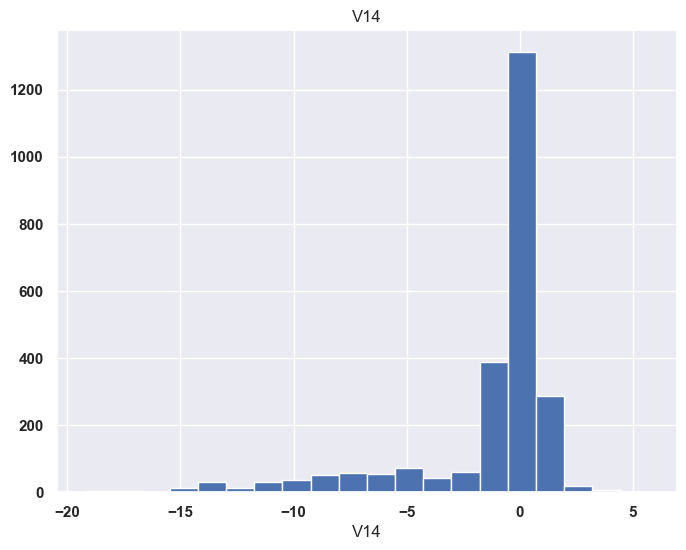

count   2490.000
mean       0.010
std        0.931
min       -4.499
5%        -1.593
10%       -1.195
20%       -0.742
30%       -0.402
40%       -0.158
50%        0.081
60%        0.301
70%        0.527
80%        0.799
90%        1.103
95%        1.364
99%        1.994
max        2.737
Name: V15, dtype: float64


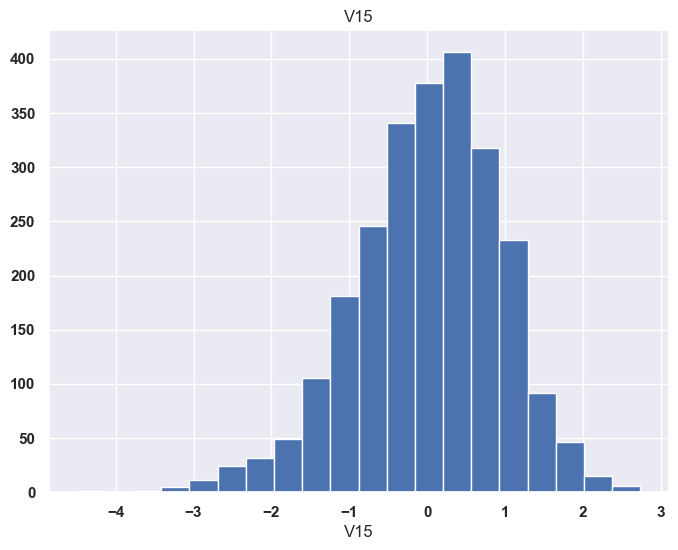

count   2490.000
mean      -0.790
std        2.507
min      -14.130
5%        -6.545
10%       -3.502
20%       -1.271
30%       -0.660
40%       -0.331
50%       -0.065
60%        0.151
70%        0.350
80%        0.586
90%        0.970
95%        1.410
99%        2.077
max        3.595
Name: V16, dtype: float64


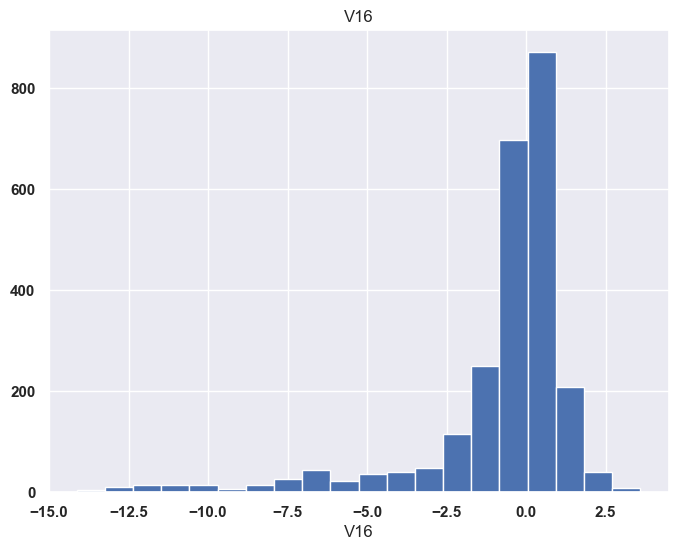

count   2490.000
mean      -1.303
std        4.131
min      -25.163
5%       -11.916
10%       -5.249
20%       -0.901
30%       -0.568
40%       -0.353
50%       -0.167
60%        0.032
70%        0.244
80%        0.475
90%        0.863
95%        1.307
99%        3.646
max        6.739
Name: V17, dtype: float64


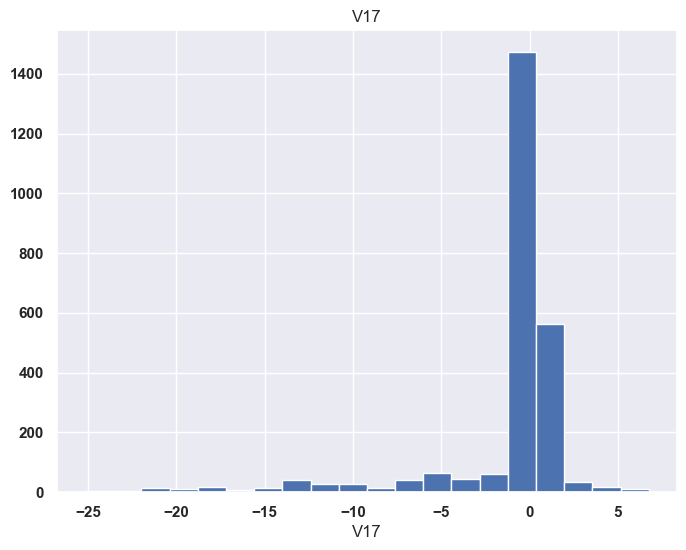

count   2490.000
mean      -0.450
std        1.730
min       -9.499
5%        -4.619
10%       -1.975
20%       -0.965
30%       -0.599
40%       -0.333
50%       -0.116
60%        0.082
70%        0.292
80%        0.587
90%        1.047
95%        1.436
99%        2.207
max        3.790
Name: V18, dtype: float64


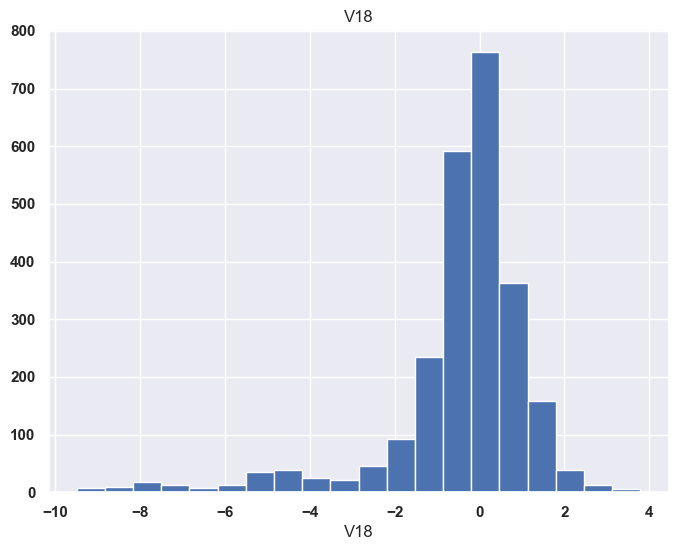

count   2490.000
mean       0.132
std        1.029
min       -3.682
5%        -1.422
10%       -1.020
20%       -0.568
30%       -0.316
40%       -0.133
50%        0.052
60%        0.256
70%        0.470
80%        0.788
90%        1.303
95%        2.033
99%        3.458
max        5.228
Name: V19, dtype: float64


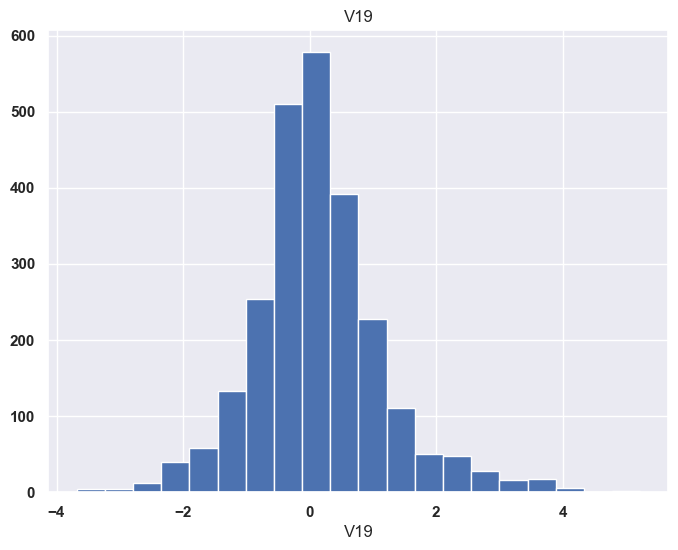

count   2490.000
mean       0.070
std        0.865
min       -7.972
5%        -0.682
10%       -0.429
20%       -0.255
30%       -0.175
40%       -0.108
50%       -0.042
60%        0.036
70%        0.133
80%        0.290
90%        0.695
95%        1.262
99%        2.911
max       11.059
Name: V20, dtype: float64


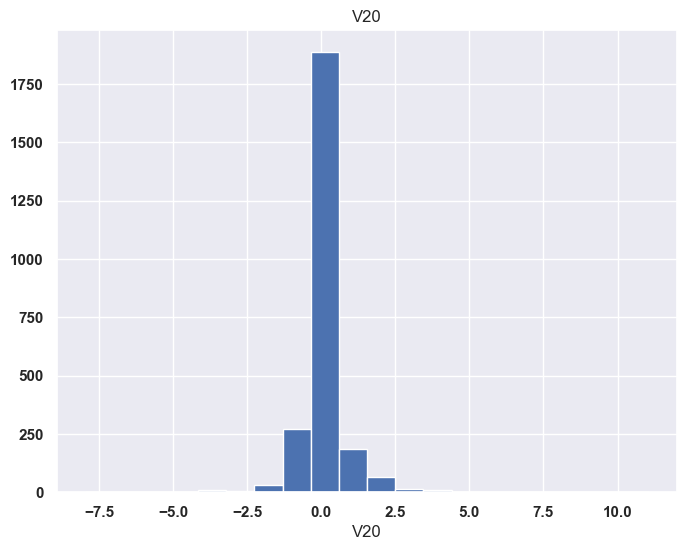

count   2490.000
mean       0.148
std        1.848
min      -22.798
5%        -0.584
10%       -0.378
20%       -0.264
30%       -0.173
40%       -0.087
50%        0.004
60%        0.111
70%        0.224
80%        0.380
90%        0.871
95%        1.723
99%        2.997
max       27.203
Name: V21, dtype: float64


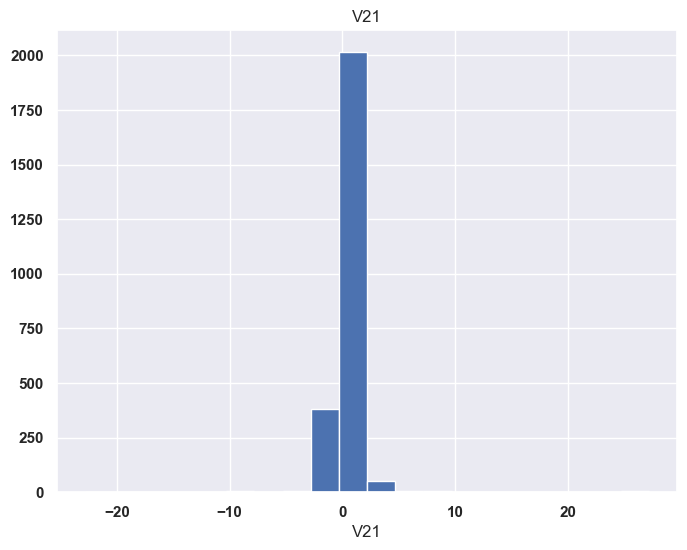

count   2490.000
mean      -0.006
std        0.926
min       -8.887
5%        -1.075
10%       -0.877
20%       -0.665
30%       -0.472
40%       -0.220
50%       -0.006
60%        0.196
70%        0.412
80%        0.669
90%        0.959
95%        1.183
99%        1.748
max        8.362
Name: V22, dtype: float64


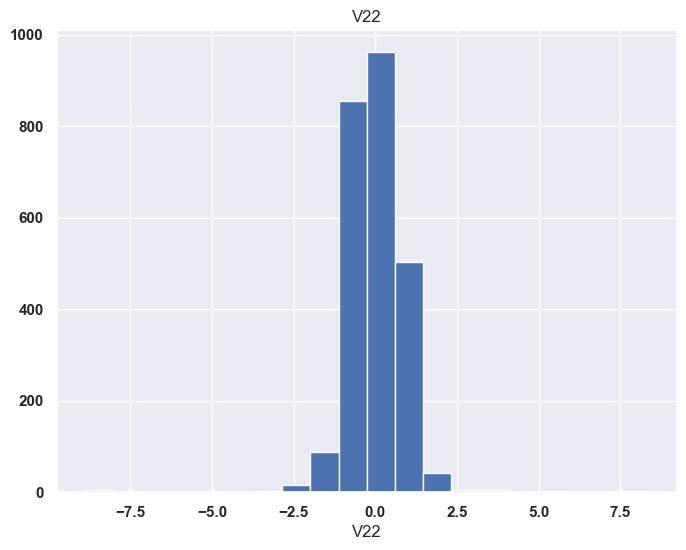

count   2490.000
mean      -0.017
std        0.887
min      -19.254
5%        -0.664
10%       -0.390
20%       -0.224
30%       -0.141
40%       -0.073
50%       -0.014
60%        0.042
70%        0.122
80%        0.228
90%        0.396
95%        0.712
99%        2.014
max        6.992
Name: V23, dtype: float64


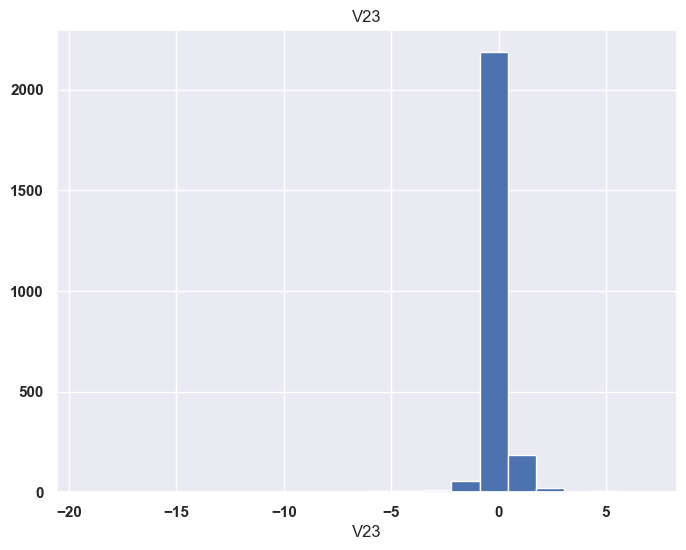

count   2490.000
mean      -0.008
std        0.597
min       -2.144
5%        -1.074
10%       -0.828
20%       -0.462
30%       -0.278
40%       -0.060
50%        0.035
60%        0.144
70%        0.351
80%        0.502
90%        0.677
95%        0.801
99%        1.043
max        3.957
Name: V24, dtype: float64


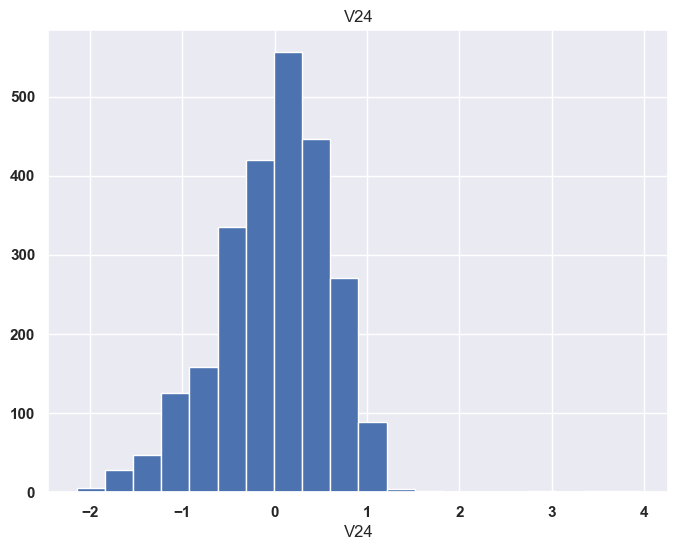

count   2490.000
mean       0.005
std        0.567
min       -4.782
5%        -0.824
10%       -0.623
20%       -0.397
30%       -0.264
40%       -0.131
50%        0.011
60%        0.155
70%        0.285
80%        0.419
90%        0.634
95%        0.821
99%        1.456
max        2.610
Name: V25, dtype: float64


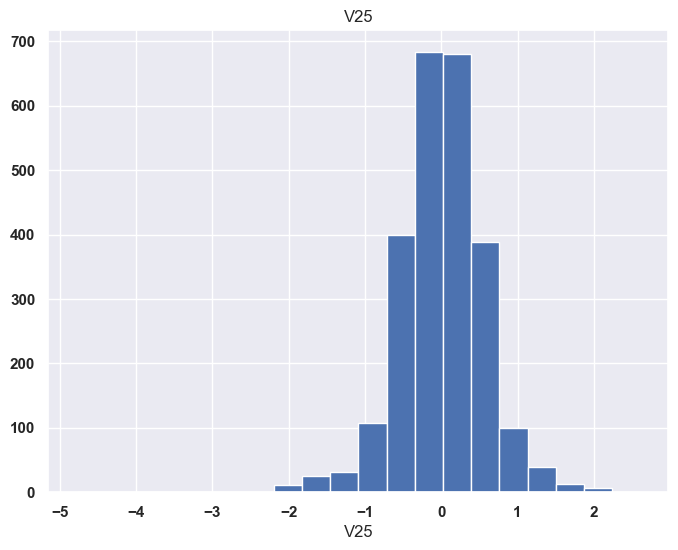

count   2490.000
mean       0.008
std        0.472
min       -1.312
5%        -0.679
10%       -0.523
20%       -0.367
30%       -0.250
40%       -0.156
50%       -0.039
60%        0.094
70%        0.189
80%        0.387
90%        0.652
95%        0.866
99%        1.163
max        2.745
Name: V26, dtype: float64


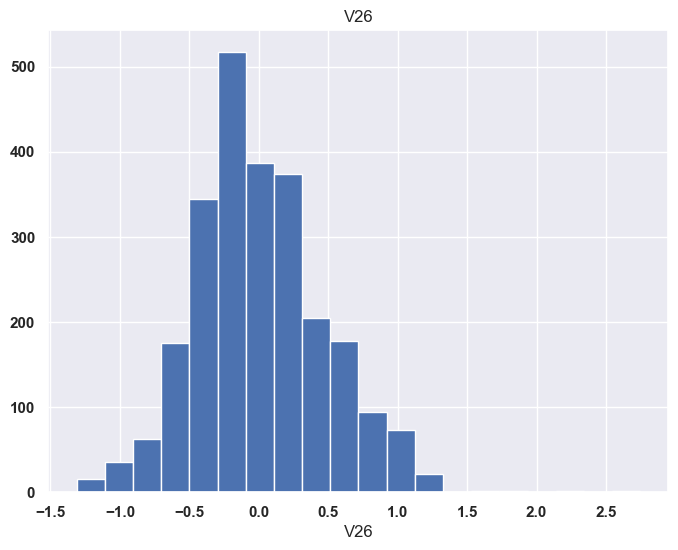

count   2490.000
mean       0.023
std        0.722
min       -7.263
5%        -0.741
10%       -0.277
20%       -0.098
30%       -0.050
40%       -0.015
50%        0.017
60%        0.047
70%        0.113
80%        0.257
90%        0.527
95%        0.919
99%        1.904
max        3.052
Name: V27, dtype: float64


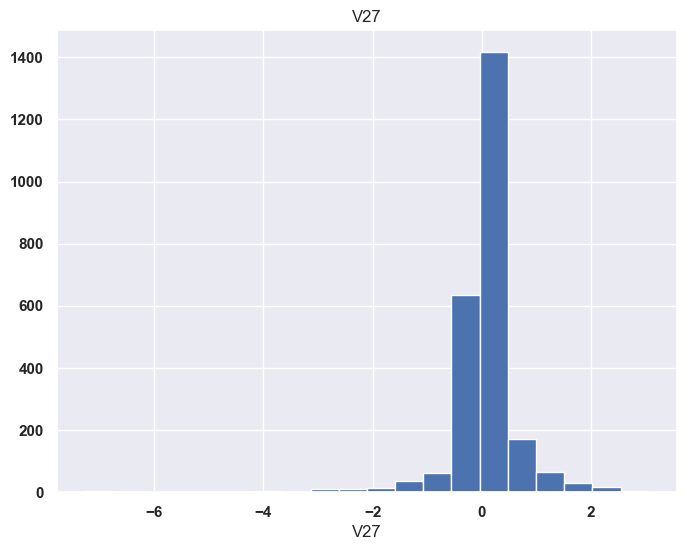

count   2490.000
mean       0.014
std        0.348
min       -2.926
5%        -0.498
10%       -0.222
20%       -0.069
30%       -0.039
40%       -0.005
50%        0.017
60%        0.036
70%        0.085
80%        0.152
90%        0.289
95%        0.426
99%        0.939
max        4.748
Name: V28, dtype: float64


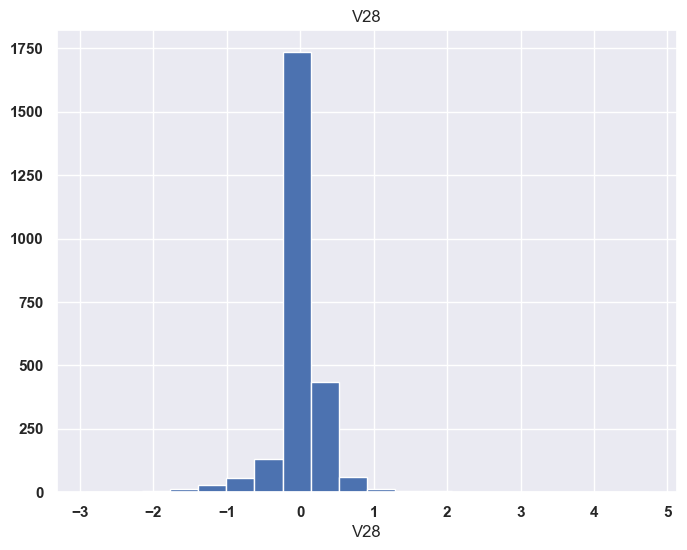

count   2490.000
mean      95.780
std      269.029
min        0.000
5%         0.857
10%        1.000
20%        1.830
30%        5.000
40%       10.696
50%       19.730
60%       35.982
70%       60.006
80%      103.082
90%      235.209
95%      392.831
99%     1231.326
max     4350.000
Name: Amount, dtype: float64


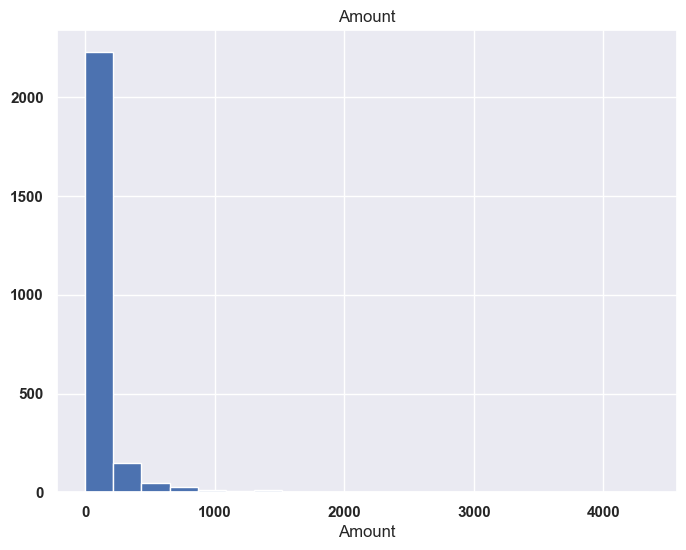

In [268]:
for col in num_cols:
    numerical_summary(df,col,True)

##  Performing target variable analysis.

In [269]:
def target_summary_with_num(dataframe, target, col_name):
    # Group the DataFrame by the target variable and calculate the mean of the numerical column
    print(dataframe.groupby(target).agg({col_name : "mean"}))

In [270]:
for col in num_cols:
    target_summary_with_num(df, "Class", col)

           Time
Class          
0     95273.792
1     80746.807
          V1
Class       
0      0.026
1     -4.772
         V2
Class      
0     0.002
1     3.624
          V3
Class       
0     -0.017
1     -7.033
          V4
Class       
0     -0.004
1      4.542
          V5
Class       
0     -0.007
1     -3.151
          V6
Class       
0     -0.025
1     -1.398
          V7
Class       
0      0.011
1     -5.569
         V8
Class      
0     0.011
1     0.571
          V9
Class       
0     -0.004
1     -2.581
         V10
Class       
0      0.004
1     -5.677
         V11
Class       
0     -0.053
1      3.800
         V12
Class       
0     -0.028
1     -6.259
         V13
Class       
0     -0.033
1     -0.109
         V14
Class       
0      0.040
1     -6.972
         V15
Class       
0      0.035
1     -0.093
         V16
Class       
0      0.034
1     -4.140
         V17
Class       
0      0.017
1     -6.666
         V18
Class       
0     -0.007
1     -2.246
        

## Analyzing outliers

In [271]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    """
    Calculate lower and upper thresholds for identifying outliers in a numerical column.

    Parameters:
    - dataframe: pandas DataFrame
    - col_name: name of the numerical column
    - q1: the first quartile (default is 0.25)
    - q3: the third quartile (default is 0.75)

    Returns:
    - low: lower threshold for outliers
    - up: upper threshold for outliers
    """

    # Calculate the first and third quartiles
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)

    # Calculate the interquartile range (IQR)
    interquartile = quartile3 - quartile1

    # Calculate the upper and lower thresholds for outliers using 1.5 times the IQR
    up = quartile3 + 1.5 * interquartile
    low = quartile1 - 1.5 * interquartile
    return low, up

In [272]:
def check_outlier(dataframe, col_name):

    """
    Check for outliers in a numerical column based on the calculated thresholds.

    Parameters:
    - dataframe: pandas DataFrame
    - col_name: name of the numerical column

    Returns:
    - True if outliers are present, False otherwise
    """

    # Calculate lower and upper thresholds for outliers
    # Note: Since there are too many outliers in the data and we do not want any loss of data, the thresholds were updated to 0.05 and 0.95.
    low, up = outlier_thresholds(dataframe, col_name,0.05,0.95)


    if dataframe[(dataframe[col_name] > up) | (dataframe[col_name] < low)].any(axis= None):
        return True
    else:
        return False


In [273]:
for col in num_cols:
    print(col, check_outlier(df,col))

Time False
V1 True
V2 True
V3 True
V4 False
V5 True
V6 True
V7 True
V8 True
V9 True
V10 True
V11 False
V12 False
V13 False
V14 False
V15 False
V16 False
V17 False
V18 False
V19 False
V20 True
V21 True
V22 True
V23 True
V24 True
V25 True
V26 False
V27 True
V28 True
Amount True


In [274]:
def replace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    """
    Replace values in a numerical column with lower and upper thresholds to handle outliers.

    Parameters:
    - dataframe: pandas DataFrame
    - variable: name of the numerical column
    - q1: the first quartile (default is 0.25)
    - q3: the third quartile (default is 0.75)

    Returns:
    None
    """
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)

    # Replace values below the lower threshold with the lower threshold
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit

    # Replace values above the upper threshold with the upper threshold
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [275]:
for col in num_cols:
    if check_outlier(df,col):
        replace_with_thresholds(df,col,0.05,0.95)

In [276]:
for col in num_cols:
    print(col, check_outlier(df,col))

Time False
V1 False
V2 False
V3 False
V4 False
V5 False
V6 False
V7 False
V8 False
V9 False
V10 False
V11 False
V12 False
V13 False
V14 False
V15 False
V16 False
V17 False
V18 False
V19 False
V20 False
V21 False
V22 False
V23 False
V24 False
V25 False
V26 False
V27 False
V28 False
Amount False


## Multivariate Outlier Analysis: Local Outlier Factor

In [277]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)

array([1, 1, 1, ..., 1, 1, 1])

In [278]:
df_scores = clf.negative_outlier_factor_
df_scores[0:5]

array([-0.98805488, -0.99863449, -0.96092878, -1.51993171, -1.00655026])

In [279]:
np.sort(df_scores)[0:10]

array([-4.52647467, -4.4335472 , -4.41387994, -4.38208807, -4.32634906,
       -4.11531819, -3.92740359, -3.90030542, -3.59646724, -3.44085967])

<AxesSubplot:>

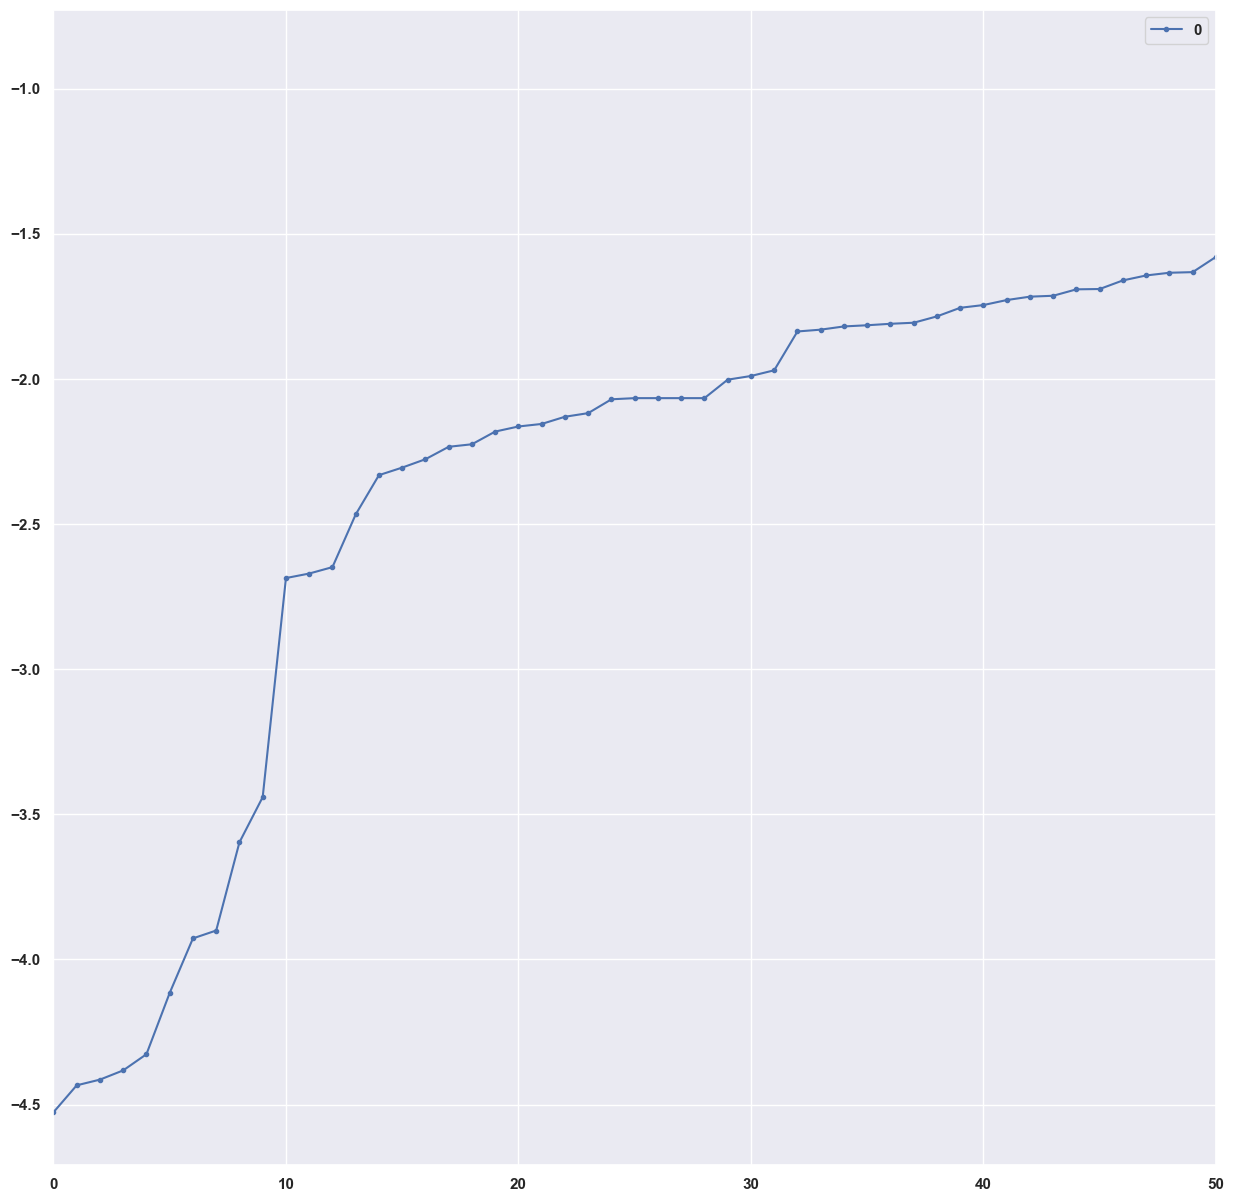

In [280]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')

In [281]:
# The data with threshold value 10 was chosen because it had the greatest change in slope.
th = np.sort(df_scores)[10]

In [282]:
th

-2.6862546902429836

In [283]:
df[df_scores < th]

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
440  91524.000  1.955  1.630 -4.337  2.378  2.113 -1.584  0.654 -0.193  1.218   
448  92092.000 -1.108  3.449 -6.217  3.021 -0.530 -2.551 -2.002  1.092 -0.836   
498  91554.000 -5.100  3.633 -3.844  0.183 -1.184  1.602 -3.006 -7.066  1.285   
692  91407.000 -3.951  2.882 -6.421  2.434 -1.327 -2.122 -3.228 -0.686  0.776   
797  92572.000  1.483 -1.142 -0.773  0.388 -0.019  1.442 -0.768  0.426  2.462   
1051 93157.000 -0.178  0.993 -0.090 -0.776  0.965 -0.217  0.733 -0.034  1.327   
1066 92102.000 -1.663  3.254 -7.040  2.266 -4.178 -0.747 -0.248  1.091 -0.307   
1450 91502.000  0.007  2.365 -2.600  1.112  3.276 -1.776  2.115 -0.830  0.900   
1643 92466.000 -1.688  1.485  0.881 -0.406 -0.435  0.143 -0.317  0.560  1.642   
1710 92476.000  1.502 -1.228  0.297  1.032 -1.483 -0.181 -0.944  0.004  2.894   

        V10    V11    V12    V13    V14    V15    V16    V17    V18    V19  \
440  -2.829  3.505 -3.918 -1.016 -4.705 -0.969  1.855  6.024  3.531 -1.196   
448  -4.096  2.426 -6.067  1.832 -3.502 -1.004 -3.501 -2.942 -1.126  0.374   
498  -3.717  3.719 -5.034  0.919 -4.220 -1.050 -1.691 -2.372  0.450  0.408   
692  -4.723  4.922 -8.753  1.520 -8.552  0.352 -4.534 -6.465 -1.890  0.175   
797  -0.493  1.715 -1.978  0.722  1.925  0.508 -0.162  0.474  0.091 -1.180   
1051 -0.284  0.738 -2.295  1.202  1.721 -1.690  0.377 -0.276  0.404  0.361   
1066 -5.568  2.713 -5.948  2.145 -4.212 -0.137 -2.639 -2.532 -0.667  0.626   
1450 -3.376  2.057 -3.984  1.022 -5.968 -1.152  1.680  5.586  2.789 -2.241   
1643 -0.656  0.958 -2.130  0.915  1.886 -0.741  0.396  0.140  1.057  0.650   
1710 -0.447 -0.108 -2.495  1.323  1.145  0.258  0.822  0.021  0.794 -0.846   

        V20    V21    V22    V23    V24    V25    V26    V27    V28  Amount  \
440  -0.231 -0.474 -0.975 -0.048 -0.024  0.362 -0.571  0.026  0.082   1.000   
448  -0.069  0.826  1.144  0.209 -0.295 -0.690 -0.365  0.229  0.209  18.000   
498  -2.806  5.183 -2.797  1.091 -0.159  0.532 -0.497  0.944  0.554 261.220   
692  -0.669  1.410  0.279  0.571  0.656 -0.299 -0.408 -1.379  1.379  52.690   
797   0.013  0.264  0.753 -0.017 -1.698 -0.435 -0.188  0.008 -0.037 207.720   
1051  0.056 -0.463 -0.901 -0.038 -1.123 -0.372  0.152  0.319  0.134   5.860   
1066 -0.842  0.450  0.521  0.308 -0.318 -1.255 -0.692  0.265 -0.130 600.730   
1450 -0.006 -0.564 -0.902 -0.404 -0.013  0.590 -0.734 -0.448 -0.362   1.000   
1643 -0.374 -0.123 -0.499 -0.068 -0.616 -0.401 -0.660 -1.126 -0.198  14.280   
1710  0.200  0.201  0.470  0.054  0.014 -0.635  0.267 -0.048  0.003 238.800   

      Class  
440       1  
448       1  
498       1  
692       1  
797       0  
1051      0  
1066      1  
1450      1  
1643      0  
1710      0

In [284]:
df[df_scores < th].index

Int64Index([440, 448, 498, 692, 797, 1051, 1066, 1450, 1643, 1710], dtype='int64')

In [285]:
df.shape

(2490, 31)

In [286]:
df.drop(df[df_scores < th].index, inplace=True)

In [287]:
df.shape

(2480, 31)

## Performing missing observation analysis.

In [288]:
df.isnull().values.any()

False

## Assigning a missing value to the dataset

In [289]:
np.random.seed(42)
num_columns = df.shape[1]
data = np.random.rand(num_rows, num_columns)

# There were no null values in the dataset, null values were assigned to the dataset manually.
# Function to randomly assign null values to the DataFrame
def assign_random_nulls(df, num_nulls):

    col_set = set()

    while len(col_set) < 5:
        col_set.add(np.random.randint(0,df.shape[1]))

    #for _ in range(num_nulls):
    while df.isnull().sum().sum() < num_nulls:
        # Choose a random row and column index
        row_index = np.random.randint(0, df.shape[0])

        col_index = np.random.choice(list(col_set))

        # Assign null value to the selected cell
        df.iat[row_index, col_index] = np.nan

# Assign n random null values to the DataFrame
num_nulls = 400 # The number of null values can be changed here.
assign_random_nulls(df, num_nulls)

In [290]:
df.shape

(2480, 31)

## Performing missing observation analysis after assigning a missing value

In [291]:
df.isnull().values.any()

True

In [292]:
df.isnull().sum()

Time       0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8        71
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16       92
V17        0
V18        0
V19       88
V20        0
V21        0
V22        0
V23       68
V24        0
V25        0
V26        0
V27        0
V28       81
Amount     0
Class      0
dtype: int64

In [293]:
df.isnull().sum().sum()

400

In [294]:
def missing_values_table(dataframe, na_name=False):
    """
    Display a table summarizing missing values in the DataFrame.

    Parameters:
    - dataframe: pandas DataFrame
    - na_name: whether to return the names of columns with missing values (default is False)

    Returns:
    - If na_name is True, returns a list of column names with missing values.
      Otherwise, prints a table summarizing missing values.
    """
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss,ratio], axis = 1, keys = ["n_miss","ratio"])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [295]:
na_cols = missing_values_table(df,True)

     n_miss  ratio
V16      92  3.710
V19      88  3.548
V28      81  3.266
V8       71  2.863
V23      68  2.742


In [296]:
df[df.isnull().any(axis = 1)]

Time      V1      V2      V3     V4      V5     V6      V7     V8  \
2    162897.000   2.334  -1.192  -1.511 -1.769  -0.835 -0.954  -0.750    NaN   
16   153761.000   1.146   1.403  -4.159  2.660  -0.323 -1.836  -1.624    NaN   
18    36881.000  -2.161   1.293   1.668 -0.100  -0.930  1.245   0.810 -0.131   
20    75581.000  -2.866   2.347  -4.053  3.983  -3.463 -1.281  -4.475    NaN   
24   134766.000  -0.080   3.222  -3.724  6.037   0.583 -0.691  -1.800 -2.628   
29   148654.000  -0.292   1.186  -0.481 -0.364   0.402 -1.002   0.699  0.185   
31    25818.000  -1.156  -1.039   0.722 -3.570   1.892  3.195  -1.156  0.716   
32   129086.000  -1.009   0.758   0.887 -0.921   0.324  1.184   0.218  0.784   
45   165299.000  -0.157   1.265   0.768  2.843   1.094 -0.007   1.666 -0.435   
48   132174.000  -0.653  -0.556   1.165 -1.137  -1.159  0.347  -0.961  0.706   
49   138027.000  -0.307   0.714  -0.081 -0.064   0.695 -0.725   1.114 -0.412   
51    65385.000  -2.924   1.525  -3.019  3.289  -5.756  2.218  -0.510    NaN   
60    17838.000  -5.188   6.968 -13.511  8.618 -11.214  0.672  -9.463  5.329   
64   157420.000   2.080  -0.962  -1.040 -0.631  -0.524  0.081  -0.786  0.051   
75    51145.000   1.594  -1.041  -1.594 -2.524   1.340  2.947  -1.047  0.615   
84    86660.000   1.973  -1.063  -0.692 -0.363  -1.115 -0.648  -0.703 -0.066   
85    41607.000 -18.248   8.713 -17.880  9.249 -14.541 -1.912 -18.015  5.522   
94    55555.000   1.336   0.265  -0.395  0.170   0.536  0.243  -0.049  0.050   
109   55006.000  -0.664  -0.282   1.851 -0.643  -1.652  1.456  -0.905  0.863   
122  154041.000   1.465  -0.869  -0.692  1.417  -0.369  0.252  -0.080  0.108   
130  115713.000   1.839  -0.773  -0.506 -0.167  -0.839 -0.751  -0.401 -0.231   
134  110547.000  -1.533   2.233  -5.923  3.387  -0.153 -1.420  -3.879  1.445   
139  129865.000   0.184   1.159  -0.463 -0.168   0.711 -1.397   1.046 -0.309   
160   58217.000  -0.444   1.271   1.206  0.790   0.419 -0.848   0.918 -0.236   
163  125348.000   2.020  -0.437  -0.790  0.006  -0.197  0.126  -0.647    NaN   
165  127483.000   1.620  -0.463  -0.025  1.892  -0.901 -0.733  -0.007 -0.145   
167   53451.000   0.385   1.218  -1.954  2.087  -1.144 -0.577  -2.583  0.643   
178  126082.000  -0.349  -0.323   0.941 -0.558  -0.297  1.341   0.400  0.558   
184  156760.000   1.994  -0.020  -1.644  0.368   0.254 -0.690   0.015 -0.031   
186   63579.000  -0.493   1.002   1.878  1.720  -0.024  0.105   0.741 -0.220   
194   51155.000 -11.205   7.915 -13.988  4.333  -8.485 -3.507  -8.935  7.570   
196   20281.000   1.164  -0.229   1.172 -0.497  -1.018 -0.464  -0.645 -0.063   
200   38440.000   1.268  -0.656   0.719 -0.617  -1.363 -0.732  -0.691 -0.031   
207   63578.000  -0.639  -0.086   1.265  1.401  -0.261  1.010   1.302 -0.135   
212  140805.000  -0.615   0.796  -0.481  0.891   0.444  0.176   2.077    NaN   
213  157882.000   1.232  -2.308  -1.466 -0.121  -1.046 -0.127  -0.040 -0.261   
223  131917.000   2.127  -0.927  -0.660 -0.692  -0.696  0.263  -1.072  0.185   
224   39080.000  -6.579 -12.344  -3.172  2.738  -5.539  1.277   4.281 -0.724   
237  165981.000  -5.767  -8.402   0.057  6.951   9.881 -5.773  -5.749    NaN   
239  149640.000   0.754   2.380  -5.137  3.818   0.043 -1.285  -1.767  0.757   
242   35953.000  -4.844   5.649  -6.730  5.253  -4.410 -1.741  -6.312  3.449   
251  142509.000  -0.134  -0.800  -0.674 -1.289  -1.771  0.956   1.770    NaN   
252  121284.000  -0.720   1.274  -0.825 -0.886   1.387  0.624   0.406 -2.842   
269  138854.000  -3.973  -4.272   0.334 -1.282   1.385 -1.520  -0.768    NaN   
274  146385.000  -2.761   1.038  -0.206 -0.326   5.540 -3.336  -9.083    NaN   
275   76656.000  -2.973   1.922  -0.594 -1.136  -1.581 -1.427  -0.366  1.544   
276   67003.000  -3.540   2.429   0.111  2.200  -0.087  0.633  -0.276  0.828   
277   11635.000   0.919   4.200  -7.536  7.427   1.118 -2.887  -1.341  0.364   
283   67842.000   1.255   1.195  -2.155  1.159   1.784 -0.247   0.600 -0.041   
295   62330

In [297]:
for col in na_cols:
    # Null values in the dataset are filled with median. Mean was not preferred because there are too many outliers in the dataset.
    df[col] = df[col].fillna(df[col].median())

In [298]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [299]:
df.isnull().values.any()

False

## Performing correlation analysis.

In [300]:
df[num_cols].corr()

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
Time    1.000  0.185 -0.169  0.028 -0.175  0.232  0.017  0.187 -0.141  0.124   
V1      0.185  1.000 -0.678  0.778 -0.565  0.716  0.270  0.789 -0.289  0.588   
V2     -0.169 -0.678  1.000 -0.743  0.604 -0.655 -0.241 -0.750  0.241 -0.591   
V3      0.028  0.778 -0.743  1.000 -0.721  0.753  0.372  0.844 -0.355  0.692   
V4     -0.175 -0.565  0.604 -0.721  1.000 -0.521 -0.346 -0.673  0.267 -0.654   
V5      0.232  0.716 -0.655  0.753 -0.521  1.000  0.220  0.751 -0.353  0.569   
V6      0.017  0.270 -0.241  0.372 -0.346  0.220  1.000  0.310 -0.350  0.290   
V7      0.187  0.789 -0.750  0.844 -0.673  0.751  0.310  1.000 -0.291  0.665   
V8     -0.141 -0.289  0.241 -0.355  0.267 -0.353 -0.350 -0.291  1.000 -0.261   
V9      0.124  0.588 -0.591  0.692 -0.654  0.569  0.290  0.665 -0.261  1.000   
V10     0.163  0.705 -0.699  0.832 -0.743  0.706  0.351  0.822 -0.304  0.743   
V11    -0.272 -0.526  0.576 -0.695  0.713 -0.507 -0.368 -0.657  0.323 -0.622   
V12     0.201  0.599 -0.632  0.768 -0.774  0.603  0.398  0.746 -0.345  0.704   
V13    -0.100 -0.030  0.011 -0.037  0.014 -0.068 -0.045 -0.030  0.127 -0.016   
V14     0.121  0.494 -0.575  0.697 -0.754  0.466  0.425  0.629 -0.343  0.647   
V15    -0.178  0.094 -0.089  0.105 -0.093  0.063  0.001  0.095  0.061  0.083   
V16     0.150  0.590 -0.578  0.697 -0.663  0.618  0.348  0.729 -0.353  0.627   
V17     0.160  0.666 -0.619  0.754 -0.690  0.715  0.348  0.796 -0.413  0.701   
V18     0.206  0.615 -0.568  0.668 -0.581  0.661  0.288  0.730 -0.362  0.622   
V19    -0.040 -0.256  0.207 -0.276  0.255 -0.319 -0.131 -0.325  0.219 -0.250   
V20    -0.086 -0.225  0.123 -0.280  0.259 -0.217 -0.137 -0.209  0.041 -0.266   
V21    -0.024 -0.134  0.122 -0.151  0.150 -0.116 -0.177 -0.160  0.285 -0.072   
V22     0.153 -0.042 -0.005 -0.052  0.082 -0.081  0.034 -0.055 -0.101 -0.141   
V23     0.065 -0.003  0.094 -0.021  0.045 -0.034  0.214 -0.068 -0.254 -0.043   
V24     0.005 -0.014 -0.030  0.023 -0.055 -0.040  0.009  0.003  0.015  0.025   
V25    -0.227 -0.039  0.090 -0.063  0.007 -0.042 -0.067  0.001  0.140 -0.034   
V26    -0.027  0.033  0.011 -0.026  0.083  0.026 -0.036 -0.010  0.050 -0.079   
V27    -0.099  0.060 -0.000 -0.040  0.077  0.052 -0.114  0.015  0.196 -0.029   
V28    -0.018  0.139  0.053  0.076 -0.012  0.136 -0.083  0.051  0.014  0.061   
Amount  0.008 -0.099 -0.295 -0.071  0.040 -0.185  0.145  0.126 -0.013 -0.028   

          V10    V11    V12    V13    V14    V15    V16    V17    V18    V19  \
Time    0.163 -0.272  0.201 -0.100  0.121 -0.178  0.150  0.160  0.206 -0.040   
V1      0.705 -0.526  0.599 -0.030  0.494  0.094  0.590  0.666  0.615 -0.256   
V2     -0.699  0.576 -0.632  0.011 -0.575 -0.089 -0.578 -0.619 -0.568  0.207   
V3      0.832 -0.695  0.768 -0.037  0.697  0.105  0.697  0.754  0.668 -0.276   
V4     -0.743  0.713 -0.774  0.014 -0.754 -0.093 -0.663 -0.690 -0.581  0.255   
V5      0.706 -0.507  0.603 -0.068  0.466  0.063  0.618  0.715  0.661 -0.319   
V6      0.351 -0.368  0.398 -0.045  0.425  0.001  0.348  0.348  0.288 -0.131   
V7      0.822 -0.657  0.746 -0.030  0.629  0.095  0.729  0.796  0.730 -0.325   
V8     -0.304  0.323 -0.345  0.127 -0.343  0.061 -0.353 -0.413 -0.362  0.219   
V9      0.743 -0.622  0.704 -0.016  0.647  0.083  0.627  0.701  0.622 -0.250   
V10     1.000 -0.768  0.859 -0.026  0.778  0.109  0.793  0.848  0.750 -0.338   
V11    -0.768  1.000 -0.837  0.029 -0.834 -0.078 -0.731 -0.754 -0.626  0.326   
V12     0.859 -0.837  1.000 -0.045  0.864  0.070  0.830  0.867  0.747 -0.377   
V13    -0.026  0.029 -0.045  1.000 -0.009  0.008 -0.038 -0.079 -0.065  0.075   
V14     0.778 -0.834  0.864 -0.009  1.000  0.033  0.751  0.757  0.616 -0.320   
V15     0.109 -0.078  0.070  0.008  0.033  1.000  0.031  0.053  0.043  0.092   
V16     0.793 -0.731  0.830 -0.038  0.751  0.031  1.000  0.881  0.784 -0.461   
V17     0.848 -0.754  0.867 -0.079  0.757  0.053  0.881  1.000  0.869 -0.470   
V18     

In [301]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu", annot=True)
        plt.show(block=True)
    return drop_list

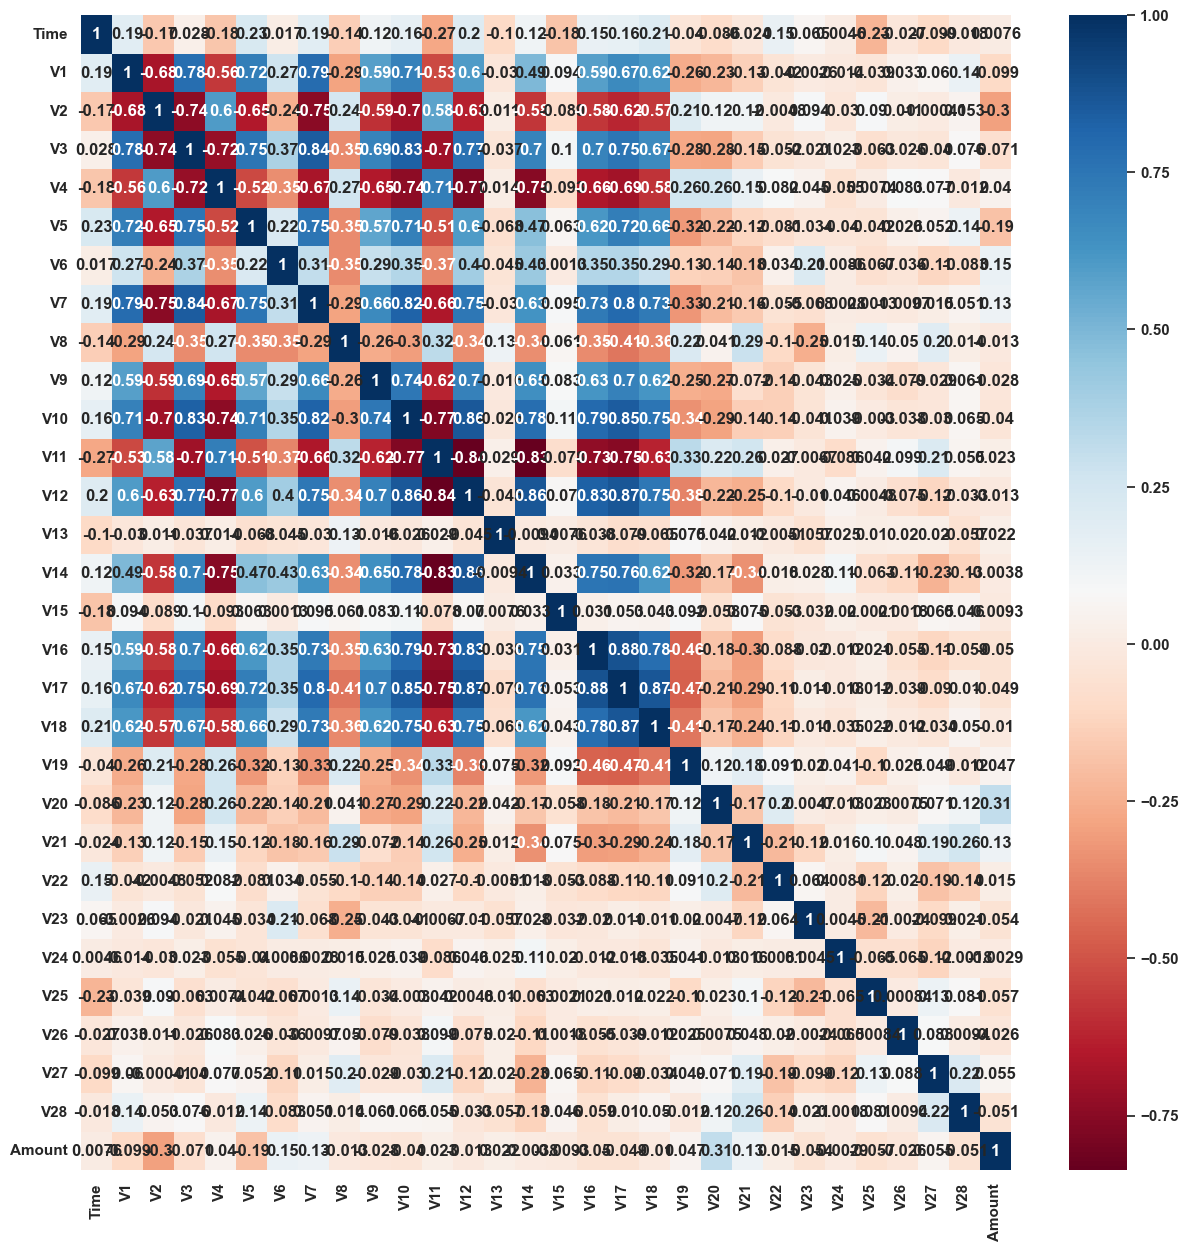

[]

In [302]:
high_correlated_cols(df[num_cols], plot=True)

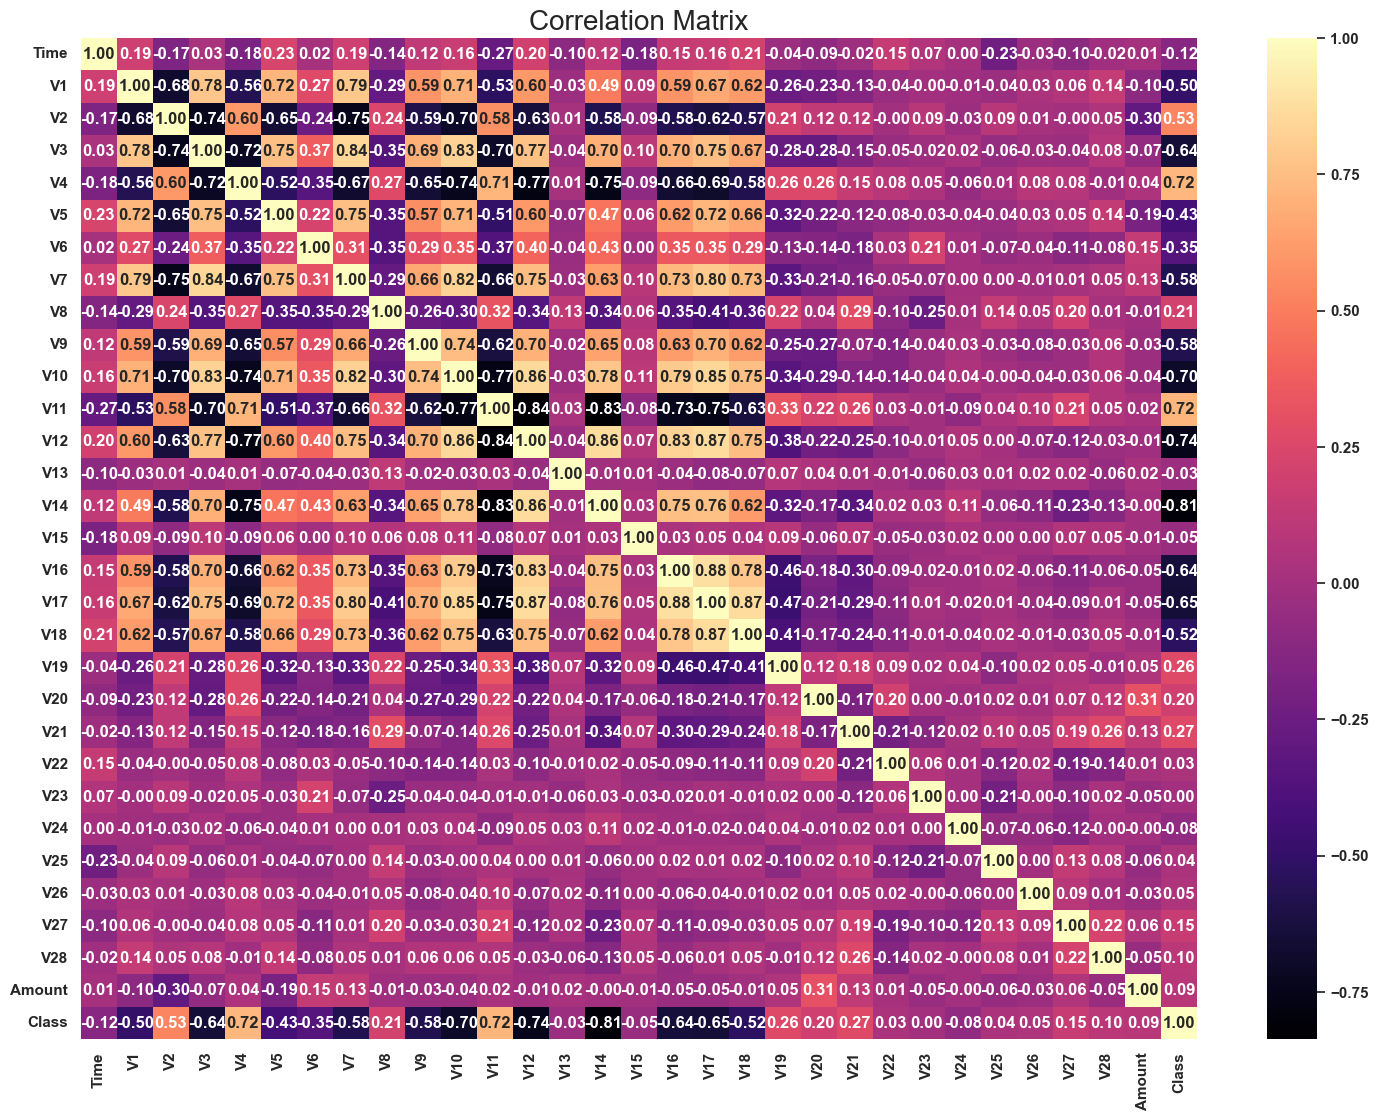

In [303]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show(block=True)

## Feautre Engineering

In [304]:
# For privacy reasons, feature names were not given in the dataset, so semantic inference could not be made when creating a new feature.
# Variables were randomly treated with one another.
df["NEW_V1*V2"] = df["V1"] * df["V2"]
df["NEW_V3*V4"] = df["V3"] * df["V4"]
df["NEW_V5*V6"] = df["V5"] * df["V6"]
df["NEW_V7*V8*V9"] = df["V7"] * df["V8"] * df["V9"]
df["NEW_V10*V11"] = df["V10"] * df["V11"]
df["NEW_V12*V13*V14"] = df["V12"] * df["V13"] * df["V14"]
df["NEW_V15*V16"] = df["V15"] * df["V16"]
df["NEW_V17*V18"] = df["V17"] * df["V18"]
df["NEW_V19*V20*V21"] = df["V19"] * df["V20"] * df["V21"]
df["NEW_V22*V23"] = df["V22"] * df["V23"]
df["NEW_V24*V25*V26"] = df["V24"] * df["V25"] * df["V26"]
df["NEW_V27*V28"] = df["V27"] * df["V28"]
df["NEW_V2*V3"] = df["V2"] * df["V3"]
df["NEW_V4*V5*V6"] = df["V4"] * df["V5"] * df["V6"]
df["NEW_V7*V8"] = df["V7"] * df["V8"]
df["NEW_V9*V10*V11"] = df["V9"] * df["V10"] * df["V11"]
df["NEW_V12*V13"] = df["V12"] * df["V13"]
df["NEW_V14*V15*V16"] = df["V14"] * df["V15"] * df["V16"]
df["NEW_V17*V18*V19"] = df["V17"] * df["V18"] * df["V19"]


## Standardize for numeric variables.

In [305]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2480
Variables: 50
Categorical Columns: 1
Numeric Columns: 49
Categorical Looking but Cardinal: 0
Numeric Looking but Categorical: 1


In [306]:
num_cols

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'NEW_V1*V2',
 'NEW_V3*V4',
 'NEW_V5*V6',
 'NEW_V7*V8*V9',
 'NEW_V10*V11',
 'NEW_V12*V13*V14',
 'NEW_V15*V16',
 'NEW_V17*V18',
 'NEW_V19*V20*V21',
 'NEW_V22*V23',
 'NEW_V24*V25*V26',
 'NEW_V27*V28',
 'NEW_V2*V3',
 'NEW_V4*V5*V6',
 'NEW_V7*V8',
 'NEW_V9*V10*V11',
 'NEW_V12*V13',
 'NEW_V14*V15*V16',
 'NEW_V17*V18*V19']

In [307]:
df[num_cols].head()

Time     V1     V2     V3     V4     V5     V6     V7    V8     V9  \
0  48083.000 -0.799  1.175  0.825  0.136  0.047 -0.509  0.680 0.347 -1.362   
1 160895.000 -0.848  2.720 -6.199  3.044 -3.302 -1.992 -3.735 1.520 -2.549   
2 162897.000  2.334 -1.192 -1.511 -1.769 -0.835 -0.954 -0.750 0.047 -1.788   
3 147501.000 -1.612 -0.408 -3.830  6.249 -3.361  1.148  1.858 0.475 -3.838   
4  11110.000  0.884 -0.428  1.509  1.001 -1.197 -0.030 -0.755 0.046  1.898   

     V10   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -0.466 0.949  0.639  0.047  0.933  0.225  0.069 -0.172  0.037  1.366  0.065   
1 -4.534 2.288 -5.267  0.395 -4.288  1.315 -6.469 -8.714 -3.705  3.531  0.320   
2  1.876 0.490 -0.922 -0.896  0.445 -0.406 -0.362  0.221  0.237  0.259 -0.538   
3 -1.445 2.114 -3.260 -0.315 -1.808 -0.742 -2.987 -4.816 -1.272  1.702  2.426   
4 -0.591 1.141 -1.843  2.433  1.178  1.042  0.419  0.405  0.098 -1.347  0.140   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  NEW_V1*V2  \
0 -0.201 -0.874  0.035 -0.009 -0.136  0.221 -0.107  0.017  42.900     -0.939   
1  1.125  0.805  0.199  0.035  0.012  0.602  0.137 -0.171 127.140     -2.307   
2 -0.297 -0.501  0.276 -0.476 -0.218 -0.301 -0.030 -0.076   2.950     -2.781   
3  1.246  0.616  2.251 -0.066  0.539  0.541 -0.136 -0.010 980.792      0.658   
4  0.206  0.668 -0.072  0.421  0.043  0.426 -0.009  0.050 134.700     -0.379   

   NEW_V3*V4  NEW_V5*V6  NEW_V7*V8*V9  NEW_V10*V11  NEW_V12*V13*V14  \
0      0.113     -0.024        -0.321       -0.442            0.028   
1    -18.873      6.578        14.470      -10.373            8.917   
2      2.673      0.797         0.063        0.919            0.368   
3    -23.934     -3.858        -3.387       -3.055           -1.859   
4      1.510      0.036        -0.066       -0.675           -5.285   

   NEW_V15*V16  NEW_V17*V18  NEW_V19*V20*V21  NEW_V22*V23  NEW_V24*V25*V26  \
0        0.016       -0.006           -0.018       -0.030            0.000   
1       -8.509       32.286            1.270        0.160            0.000   
2        0.147        0.052            0.041       -0.138           -0.031   
3        2.216        6.124            5.141        1.388           -0.019   
4        0.437        0.040           -0.039       -0.048            0.008   

   NEW_V27*V28  NEW_V2*V3  NEW_V4*V5*V6  NEW_V7*V8  NEW_V9*V10*V11  \
0       -0.002      0.969        -0.003      0.236           0.602   
1       -0.024    -16.861        20.026     -5.677          26.438   
2        0.002      1.801        -1.410     -0.035          -1.643   
3        0.001      1.564       -24.112      0.882          11.728   
4       -0.000     -0.647         0.036     -0.035          -1.281   

   NEW_V12*V13  NEW_V14*V15*V16  NEW_V17*V18*V19  
0        0.030            0.014           -0.009  
1       -2.079           36.486          114.001  
2        0.826            0.066            0.014  
3        1.028           -4.007           10.421  
4       -4.484            0.515           -0.053

In [308]:
# RobustScaler was used for standardization operations because there are too many outliers in the dataset.
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])

In [309]:
df[num_cols].head()

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0 -0.407 -0.197  0.551  0.440 -0.095  0.167 -0.079  0.544  0.461 -0.749   
1  0.895 -0.216  1.499 -2.430  1.319 -2.019 -1.263 -2.500  2.267 -1.524   
2  0.918  0.996 -0.903 -0.515 -1.021 -0.409 -0.434 -0.442  0.000 -1.027   
3  0.740 -0.506 -0.422 -1.462  2.877 -2.057  1.243  1.357  0.659 -2.367   
4 -0.834  0.444 -0.434  0.719  0.325 -0.645  0.303 -0.445 -0.001  1.382   

     V10   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -0.198 0.388  0.478  0.063  0.792  0.118  0.097 -0.005  0.131  1.282  0.258   
1 -3.499 1.082 -3.334  0.316 -3.089  1.017 -4.857 -7.938 -3.053  3.396  0.868   
2  1.702 0.150 -0.530 -0.624  0.430 -0.403 -0.230  0.360  0.301  0.202 -1.188   
3 -0.993 0.992 -2.038 -0.201 -1.246 -0.680 -2.219 -4.318 -0.982  1.610  5.920   
4 -0.300 0.487 -1.124  1.801  0.975  0.792  0.362  0.531  0.183 -1.366  0.437   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  NEW_V1*V2  \
0 -0.403 -0.788  0.144 -0.058 -0.219  0.453 -0.487 -0.005   0.295     -0.277   
1  2.216  0.737  0.641 -0.002  0.001  1.125  0.475 -1.198   1.366     -1.066   
2 -0.593 -0.449  0.873 -0.652 -0.340 -0.470 -0.183 -0.593  -0.213     -1.339   
3  2.453  0.565  6.844 -0.131  0.780  1.019 -0.603 -0.173  12.226      0.643   
4  0.400  0.613 -0.177  0.489  0.047  0.815 -0.100  0.204   1.463      0.046   

   NEW_V3*V4  NEW_V5*V6  NEW_V7*V8*V9  NEW_V10*V11  NEW_V12*V13*V14  \
0      0.123     -0.040        -1.783       -0.393            0.096   
1     -9.570      7.288        80.468      -10.056           27.028   
2      1.431      0.871         0.350        0.931            1.126   
3    -12.154     -4.296       -18.834       -2.936           -5.620   
4      0.837      0.026        -0.363       -0.619          -16.000   

   NEW_V15*V16  NEW_V17*V18  NEW_V19*V20*V21  NEW_V22*V23  NEW_V24*V25*V26  \
0       -0.006       -0.069           -0.587       -0.150            0.010   
1      -14.357       69.551           41.481        1.146            0.010   
2        0.215        0.058            1.351       -0.885           -0.617   
3        3.698       13.148          167.968        9.492           -0.378   
4        0.703        0.031           -1.270       -0.270            0.159   

   NEW_V27*V28  NEW_V2*V3  NEW_V4*V5*V6  NEW_V7*V8  NEW_V9*V10*V11  \
0       -0.133      0.652        -0.004      0.704           0.900   
1       -0.939    -11.250        29.451    -13.569          41.406   
2        0.015      1.207        -2.072      0.050          -2.620   
3       -0.018      1.048       -35.458      2.265          18.342   
4       -0.084     -0.427         0.054      0.051          -2.052   

   NEW_V12*V13  NEW_V14*V15*V16  NEW_V17*V18*V19  
0       -0.017            0.063           -0.059  
1       -2.902          139.085          598.315  
2        1.073            0.257            0.059  
3        1.349          -15.265           54.683  
4       -6.192            1.971           -0.293

In [310]:
df.head()

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0 -0.407 -0.197  0.551  0.440 -0.095  0.167 -0.079  0.544  0.461 -0.749   
1  0.895 -0.216  1.499 -2.430  1.319 -2.019 -1.263 -2.500  2.267 -1.524   
2  0.918  0.996 -0.903 -0.515 -1.021 -0.409 -0.434 -0.442  0.000 -1.027   
3  0.740 -0.506 -0.422 -1.462  2.877 -2.057  1.243  1.357  0.659 -2.367   
4 -0.834  0.444 -0.434  0.719  0.325 -0.645  0.303 -0.445 -0.001  1.382   

     V10   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -0.198 0.388  0.478  0.063  0.792  0.118  0.097 -0.005  0.131  1.282  0.258   
1 -3.499 1.082 -3.334  0.316 -3.089  1.017 -4.857 -7.938 -3.053  3.396  0.868   
2  1.702 0.150 -0.530 -0.624  0.430 -0.403 -0.230  0.360  0.301  0.202 -1.188   
3 -0.993 0.992 -2.038 -0.201 -1.246 -0.680 -2.219 -4.318 -0.982  1.610  5.920   
4 -0.300 0.487 -1.124  1.801  0.975  0.792  0.362  0.531  0.183 -1.366  0.437   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class  \
0 -0.403 -0.788  0.144 -0.058 -0.219  0.453 -0.487 -0.005   0.295      0   
1  2.216  0.737  0.641 -0.002  0.001  1.125  0.475 -1.198   1.366      1   
2 -0.593 -0.449  0.873 -0.652 -0.340 -0.470 -0.183 -0.593  -0.213      0   
3  2.453  0.565  6.844 -0.131  0.780  1.019 -0.603 -0.173  12.226      1   
4  0.400  0.613 -0.177  0.489  0.047  0.815 -0.100  0.204   1.463      0   

   NEW_V1*V2  NEW_V3*V4  NEW_V5*V6  NEW_V7*V8*V9  NEW_V10*V11  \
0     -0.277      0.123     -0.040        -1.783       -0.393   
1     -1.066     -9.570      7.288        80.468      -10.056   
2     -1.339      1.431      0.871         0.350        0.931   
3      0.643    -12.154     -4.296       -18.834       -2.936   
4      0.046      0.837      0.026        -0.363       -0.619   

   NEW_V12*V13*V14  NEW_V15*V16  NEW_V17*V18  NEW_V19*V20*V21  NEW_V22*V23  \
0            0.096       -0.006       -0.069           -0.587       -0.150   
1           27.028      -14.357       69.551           41.481        1.146   
2            1.126        0.215        0.058            1.351       -0.885   
3           -5.620        3.698       13.148          167.968        9.492   
4          -16.000        0.703        0.031           -1.270       -0.270   

   NEW_V24*V25*V26  NEW_V27*V28  NEW_V2*V3  NEW_V4*V5*V6  NEW_V7*V8  \
0            0.010       -0.133      0.652        -0.004      0.704   
1            0.010       -0.939    -11.250        29.451    -13.569   
2           -0.617        0.015      1.207        -2.072      0.050   
3           -0.378       -0.018      1.048       -35.458      2.265   
4            0.159       -0.084     -0.427         0.054      0.051   

   NEW_V9*V10*V11  NEW_V12*V13  NEW_V14*V15*V16  NEW_V17*V18*V19  
0           0.900       -0.017            0.063           -0.059  
1          41.406       -2.902          139.085          598.315  
2          -2.620        1.073            0.257            0.059  
3          18.342        1.349          -15.265           54.683  
4          -2.052       -6.192            1.971           -0.293

## Modeling Before Dealing with Imbalanced Dataset

In [311]:
def print_cv_results(cv_results):
    print("Accuracy: {:.2f}".format(cv_results['test_accuracy'].mean()))
    print("F1-Score: {:.2f}".format(cv_results['test_f1'].mean()))
    print("Roc-Auc: {:.2f}".format(cv_results['test_roc_auc'].mean()))
    print("Precison: {:.2f}".format(cv_results['test_precision'].mean()))
    print("Recall: {:.2f}".format(cv_results['test_recall'].mean()))

In [312]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.figure(figsize=(10,6))
    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")


    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

In [313]:
df = df.sample(frac=1, random_state = 42).reset_index(drop=True)

In [314]:
X = df.drop("Class", axis=1)
y = df["Class"]

### SVC

In [315]:
svc_model = SVC(kernel = "rbf")

In [316]:
svc_pre_cv_results = cross_validate(svc_model, X, y, cv = 10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"] )

In [317]:
print_cv_results(svc_pre_cv_results)

Accuracy: 0.91
F1-Score: 0.71
Roc-Auc: 0.93
Precison: 0.98
Recall: 0.56


### Naive Bayes

In [318]:
nb_model = GaussianNB()

In [319]:
nb_pre_cv_results = cross_validate(nb_model, X, y, cv = 10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"] )

In [320]:
print_cv_results(nb_pre_cv_results)

Accuracy: 0.95
F1-Score: 0.87
Roc-Auc: 0.96
Precison: 0.89
Recall: 0.85


### LogisticRegression

In [321]:
logistic_regression_model = LogisticRegression(random_state=17).fit(X, y)

In [322]:
lr_pre_cv_results = cross_validate(logistic_regression_model, X, y, cv = 10,scoring=["accuracy", "f1", "roc_auc", "precision", "recall"] )

In [323]:
print_cv_results(lr_pre_cv_results)

Accuracy: 0.97
F1-Score: 0.92
Roc-Auc: 0.97
Precison: 0.97
Recall: 0.87


### Neural Networks

In [324]:
mlpc_model = MLPClassifier()

In [325]:
mlpc_pre_cv_results = cross_validate(mlpc_model, X, y, cv = 10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"] )

In [326]:
print_cv_results(mlpc_pre_cv_results)

Accuracy: 0.97
F1-Score: 0.91
Roc-Auc: 0.96
Precison: 0.94
Recall: 0.88


## Dealing with Imbalanced Dataset

In [327]:
# There is an obvious imbalance in the dataset. Smote technique was used to solve this imbalance.

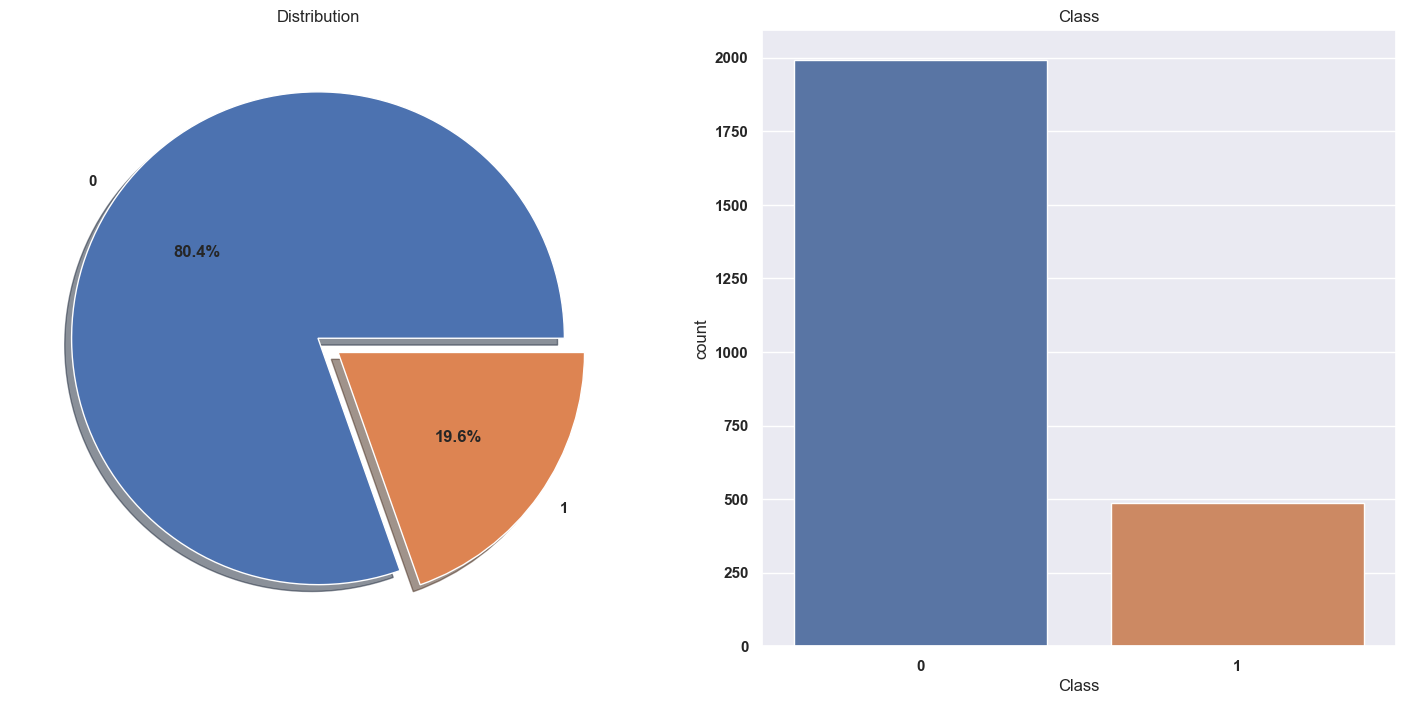

In [328]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
df['Class'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Distribution')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Class', data=df, ax=ax[1])
ax[1].set_title('Class')

plt.show()

In [329]:
# We apply the hold out method and divide the data set into training and testing (90%, 10%).
X = df.drop("Class", axis=1)
y = df["Class"]


### Confusion Matrix

In [330]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.figure(figsize=(10,6)) 
    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    
    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()




In [331]:
# Auc Roc Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr)
    plt.title("Roc Curve", fontsize=16, pad=20)
    plt.show()
    pass



### SMOTE Oversampling:

In [332]:
# Number of classes in the training set before smote
y.value_counts()

0    1994
1     486
Name: Class, dtype: int64

In [333]:
y[y==1].index

Int64Index([  11,   13,   20,   22,   24,   26,   45,   47,   54,   63,
            ...
            2449, 2450, 2453, 2454, 2464, 2470, 2473, 2476, 2477, 2478],
           dtype='int64', length=486)

In [334]:
#?SMOTE

In [335]:
# Smote application (Applied to the training set)

oversample = SMOTE(random_state = 17)#
X_smote, y_smote = oversample.fit_resample(X, y)

In [336]:
# Number of classes of the training set after smote
y_smote.value_counts()

0    1994
1    1994
Name: Class, dtype: int64

In [337]:
frames = [X_smote, y_smote]

df = pd.concat(frames, axis=1)

In [338]:
df.head()

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0 -0.453  0.584 -1.075  0.185 -0.847 -0.779  0.039 -0.501 -0.383 -1.037   
1 -0.276  0.516 -0.142  0.275  0.378 -0.201 -0.229  0.108 -0.131  0.073   
2  0.760  0.888 -0.277 -0.449  0.010  0.201 -0.280  0.165 -0.391  0.586   
3 -0.811 -0.221  0.385  0.883  0.006  0.335 -0.162  0.548 -0.709  1.105   
4  0.209  0.161  0.106  0.986  0.478 -0.157  0.458 -0.108 -0.315  1.348   

     V10    V11    V12    V13    V14    V15    V16    V17    V18    V19  \
0  1.251 -0.654 -0.421  1.037 -0.295  0.561  0.079  0.235  0.218 -0.030   
1  0.323  0.589  0.396 -0.624  0.631  0.228  0.265 -0.389  0.508 -0.266   
2  0.232 -0.629  0.075 -0.467  0.374 -0.148 -0.096 -0.020 -0.541  0.181   
3 -0.142  0.051 -1.374  1.413  0.756 -1.009 -0.386  0.758 -0.209  0.149   
4 -0.075 -0.052 -1.752  1.228  0.940  1.119 -0.559  1.029  1.006  2.147   

     V20    V21    V22    V23    V24    V25    V26    V27    V28  Amount  \
0  0.279 -0.636 -0.807 -0.184 -0.650  0.290 -0.605 -0.003  0.212   1.959   
1 -0.079  0.311  0.291 -0.378  0.632  0.833 -0.521 -0.065  0.028   0.510   
2 -0.414 -0.516 -0.606  0.976  0.879 -0.310  0.493 -0.403 -0.465  -0.038   
3  0.202 -0.745 -0.370 -0.673  0.440 -0.142  0.323 -0.465  0.000  -0.058   
4  0.765 -0.051  0.524 -0.083 -0.134 -1.465 -0.081  0.328 -0.204  -0.104   

   NEW_V1*V2  NEW_V3*V4  NEW_V5*V6  NEW_V7*V8*V9  NEW_V10*V11  \
0     -0.798     -0.080      0.548        -1.694       -1.325   
1      0.293      0.305      0.386         0.003        0.267   
2      0.060     -0.176     -0.096        -0.100       -0.027   
3     -0.186      0.400     -0.220        -2.325       -0.078   
4      0.300      1.516     -0.096         0.432        0.006   

   NEW_V12*V13*V14  NEW_V15*V16  NEW_V17*V18  NEW_V19*V20*V21  NEW_V22*V23  \
0            1.683        0.026       -0.029           -0.018        0.503   
1           -0.986        0.143       -0.661            0.085       -0.240   
2           -0.001       -0.002        0.251            0.429       -1.366   
3          -11.344        1.058       -0.561           -0.107        0.717   
4          -15.885       -1.962        2.105           -0.462       -0.101   

   NEW_V24*V25*V26  NEW_V27*V28  NEW_V2*V3  NEW_V4*V5*V6  NEW_V7*V8  \
0            0.744       -0.038     -0.194        -1.049      0.543   
1           -2.007       -0.068      0.018         0.588      0.130   
2           -0.692        0.109      0.160        -0.037      0.069   
3           -0.090       -0.133      1.158        -0.093     -0.551   
4           -0.104       -0.123      0.655        -0.142      0.236   

   NEW_V9*V10*V11  NEW_V12*V13  NEW_V14*V15*V16  NEW_V17*V18*V19  Class  
0           3.916       -1.483           -0.063           -0.011      0  
1          -0.084       -0.686            0.292            0.312      0  
2          -0.115       -0.072            0.033            0.164      0  
3          -0.319       -5.852            2.193           -0.265      0  
4          -0.137       -6.401           -4.936           11.828      0

In [339]:
# Shuffle the DataFrame
df = df.sample(frac=1, random_state = 42).reset_index(drop=True)

In [340]:
y = df["Class"]
X = df.drop(["Class"], axis = 1)

## Modeling After Dealing with Imbalanced Dataset

In [341]:
# Shuffle the DataFrame
df = df.sample(frac=1, random_state = 42).reset_index(drop=True)

In [342]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### SVC

#### hold-out

In [344]:
svc_model = SVC(kernel = "rbf")

In [345]:
svc_model.fit(X_train, y_train)

SVC()

In [346]:
y_pred = svc_model.predict(X_test)

In [347]:
#classification report
svc_results = classification_report(y_test, y_pred,output_dict = True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       191
           1       1.00      0.64      0.78       208

    accuracy                           0.81       399
   macro avg       0.86      0.82      0.81       399
weighted avg       0.87      0.81      0.81       399



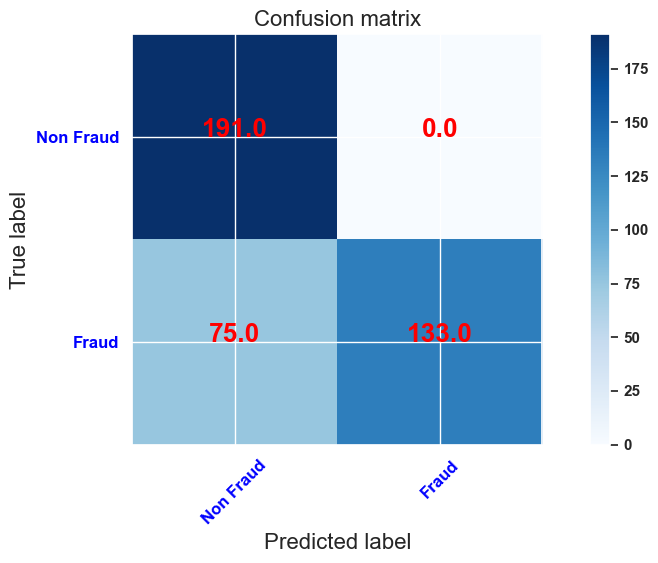

In [348]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

#### cross validation

In [349]:
svc_model = SVC(kernel = "rbf")

In [350]:
svc_cv_results = cross_validate(svc_model, X, y, cv = 10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"] )

In [351]:
print_cv_results(svc_cv_results)

Accuracy: 0.80
F1-Score: 0.74
Roc-Auc: 0.93
Precison: 0.99
Recall: 0.59


#### model tunning

In [352]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [353]:
svc_params = {"C": np.arange(1,10),
             "gamma": [ 1, 5,'scale','auto'],
             'kernel': ['linear', 'rbf']}

In [354]:
svc_best_grid = GridSearchCV(svc_model, svc_params, cv=10, n_jobs=-1, verbose=True).fit(X, y)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


In [355]:
svc_best_grid.best_params_

{'C': 9, 'gamma': 1, 'kernel': 'linear'}

In [356]:
svc_final = svc_model.set_params(**svc_best_grid.best_params_, random_state = 17).fit(X,y)

In [357]:
svc_best_cv_results = cross_validate(svc_final, X, y, cv = 10,scoring=["accuracy", "f1", "roc_auc", "precision", "recall"] )

In [358]:
print_cv_results(svc_best_cv_results)

Accuracy: 0.95
F1-Score: 0.95
Roc-Auc: 0.99
Precison: 0.98
Recall: 0.93


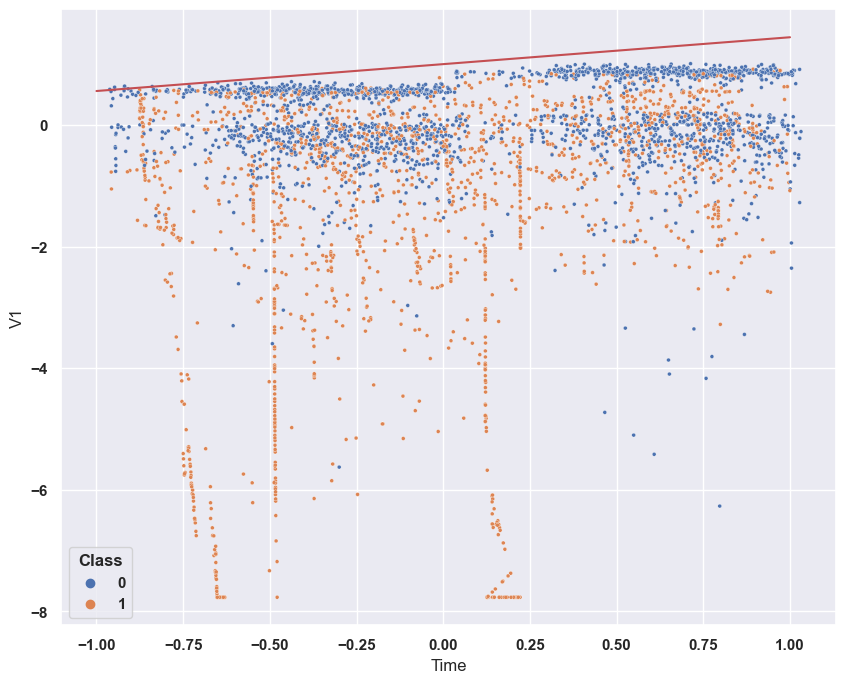

In [359]:

plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X.iloc[:, 0],
                y=X.iloc[:, 1],
                hue=y,
                s=8)
# Constructing a hyperplane using a formula.
w = svc_final.coef_[0]           # w consists of 2 elements
b = svc_final.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

### Naive Bayes

#### hold-out

In [360]:
nb_model = GaussianNB()

In [361]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [362]:
y_pred = nb_model.predict(X_test)

In [363]:
#classification report
nb_results = classification_report(y_test, y_pred,output_dict = True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       191
           1       0.98      0.83      0.90       208

    accuracy                           0.90       399
   macro avg       0.91      0.90      0.90       399
weighted avg       0.91      0.90      0.90       399



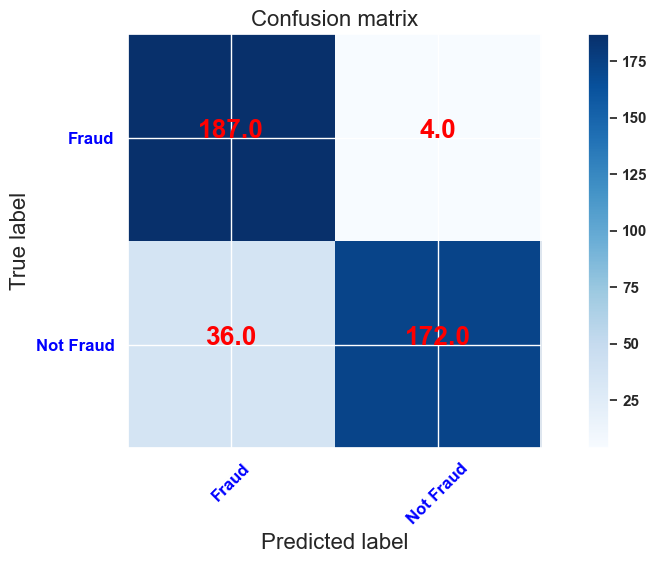

In [364]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Fraud','Not Fraud'])

#### cross-validation

In [365]:
nb_model = GaussianNB()

In [366]:
nb_cv_results = cross_validate(nb_model, X, y, cv = 10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"] )

In [367]:
print_cv_results(nb_cv_results)

Accuracy: 0.89
F1-Score: 0.88
Roc-Auc: 0.94
Precison: 0.97
Recall: 0.81


#### model tunning

In [368]:
nb_model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [369]:
nb_params = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05] }

In [370]:
nb_best_grid = GridSearchCV(nb_model, nb_params, cv=10, n_jobs=-1, verbose=True).fit(X, y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [371]:
nb_best_grid.best_params_

{'var_smoothing': 1e-08}

In [372]:
nb_final = nb_model.set_params(**nb_best_grid.best_params_).fit(X,y)

In [373]:
nb_best_cv_results = cross_validate(nb_final, X, y, cv = 10,scoring=["accuracy", "f1", "roc_auc", "precision", "recall"] )

In [374]:
print_cv_results(nb_best_cv_results)

Accuracy: 0.89
F1-Score: 0.88
Roc-Auc: 0.94
Precison: 0.97
Recall: 0.81


### LogisticRegression

#### hold-out

In [375]:
logistic_regression_model = LogisticRegression(random_state=17)

In [376]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=17)

In [377]:
y_pred = logistic_regression_model.predict(X_test)

In [378]:
#classification report
regression_results = classification_report(y_test, y_pred,output_dict = True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       191
           1       0.97      0.95      0.96       208

    accuracy                           0.96       399
   macro avg       0.96      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399



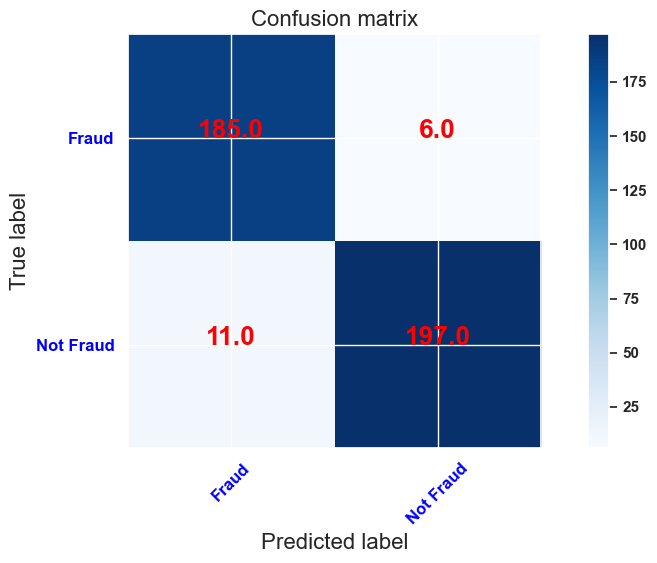

In [379]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Fraud','Not Fraud'])

#### cross-validation

In [380]:
logistic_regression_model = LogisticRegression(random_state=17).fit(X, y)

In [381]:
regression_cv_results = cross_validate(logistic_regression_model, X, y, cv = 10,scoring=["accuracy", "f1", "roc_auc", "precision", "recall"] )

In [382]:
print_cv_results(regression_cv_results)

Accuracy: 0.94
F1-Score: 0.94
Roc-Auc: 0.99
Precison: 0.97
Recall: 0.91


#### model tunning

In [383]:
logistic_regression_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 17,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [384]:
logistic_regression_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 20 ,30 ,50],  # Different values for regularization strength
    'max_iter': [50, 100, 200 , 250 ,300 ,400, 500],  # Maximum number of iterations
    'solver': ['lbfgs', 'liblinear'],  # Solver for optimization
}




In [385]:
logistic_regression_best_grid = GridSearchCV(logistic_regression_model, logistic_regression_params, cv=10, n_jobs=-1, verbose=True).fit(X, y)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


In [386]:
logistic_regression_best_grid.best_params_

{'C': 30, 'max_iter': 250, 'solver': 'lbfgs'}

In [387]:
logistic_regression_final = logistic_regression_model.set_params(**logistic_regression_best_grid.best_params_, random_state = 17).fit(X,y)

In [388]:
logistic_regression_best_cv_results = cross_validate(logistic_regression_final, X, y, cv = 10,scoring=["accuracy", "f1", "roc_auc", "precision", "recall"] )

In [389]:
print_cv_results(logistic_regression_best_cv_results)

Accuracy: 0.95
F1-Score: 0.95
Roc-Auc: 0.99
Precison: 0.97
Recall: 0.93


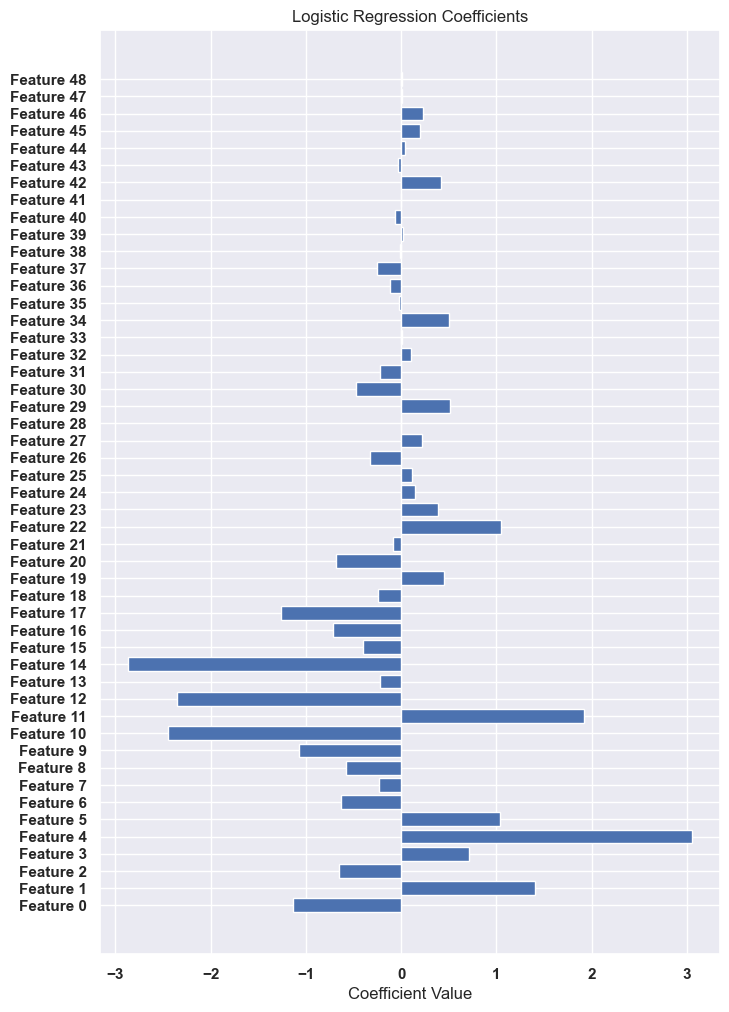

In [390]:
coef_values = logistic_regression_final.coef_[0]

# Get the feature names from your dataset
feature_names = [f'Feature {i}' for i in range(len(coef_values))]

plt.figure(figsize=(8, 12))
plt.barh(feature_names, coef_values)
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

### Neural Networks

#### hold-out

In [391]:
mlpc_model = MLPClassifier()

In [392]:
mlpc_history = mlpc_model.fit(X_train, y_train)

In [393]:
y_pred = mlpc_model.predict(X_test)

In [394]:
#classification report
mlpc_results= classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       191
           1       0.99      1.00      0.99       208

    accuracy                           0.99       399
   macro avg       0.99      0.99      0.99       399
weighted avg       0.99      0.99      0.99       399



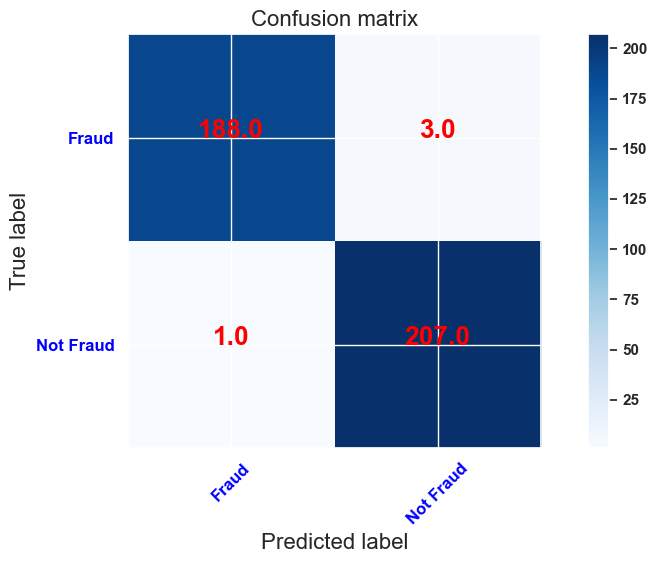

In [395]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Fraud','Not Fraud'])

#### cross-validation

In [396]:
mlpc_model = MLPClassifier()

In [397]:
mlpc_cv_results = cross_validate(mlpc_model, X, y, cv = 10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"] )

In [398]:
print_cv_results(mlpc_cv_results)

Accuracy: 0.98
F1-Score: 0.98
Roc-Auc: 1.00
Precison: 0.97
Recall: 0.99


#### model tunning

In [399]:
mlpc_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [400]:
mlpc_params = {"alpha": [0.02, 0.005, 0.001, ],
              "hidden_layer_sizes": [ (50,), (100,)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": [  "relu", "logistic"]}

In [401]:
mlpc_best_grid = GridSearchCV(mlpc_model, mlpc_params, cv=10, n_jobs=-1, verbose=True).fit(X, y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [402]:
mlpc_best_grid.best_params_

{'activation': 'relu',
 'alpha': 0.005,
 'hidden_layer_sizes': (100,),
 'solver': 'adam'}

In [403]:
mlpc_final = mlpc_model.set_params(**mlpc_best_grid.best_params_, random_state = 17).fit(X,y)

In [404]:
mlpc_best_cv_results = cross_validate(mlpc_final, X, y, cv = 10,scoring=["accuracy", "f1", "roc_auc", "precision", "recall"] )

In [405]:
print_cv_results(mlpc_best_cv_results)

Accuracy: 0.98
F1-Score: 0.98
Roc-Auc: 1.00
Precison: 0.97
Recall: 0.99


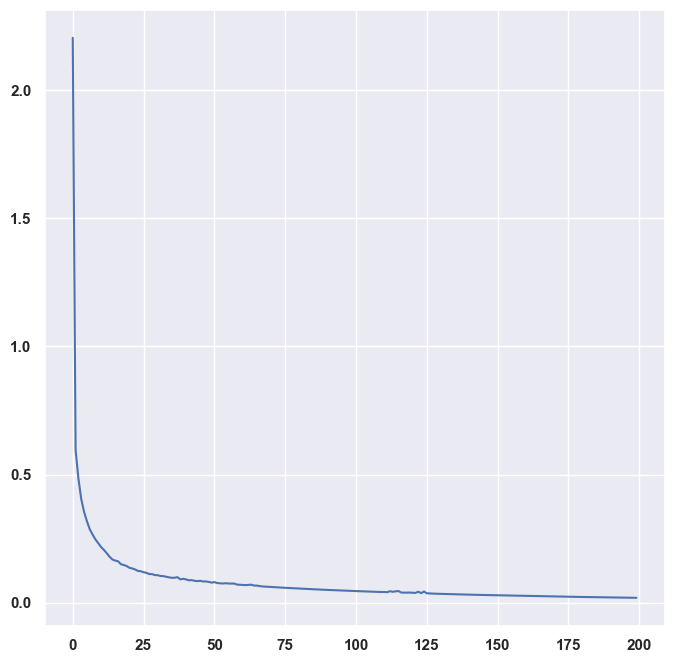

In [406]:
plt.figure(figsize=(8, 8))
# Plot the loss curve of the MLP classifier
# mlpc_final.loss_curve_ contains the values of the loss function at each iteration during training
plt.plot(mlpc_final.loss_curve_);

## FEATURE IMPORTANCE

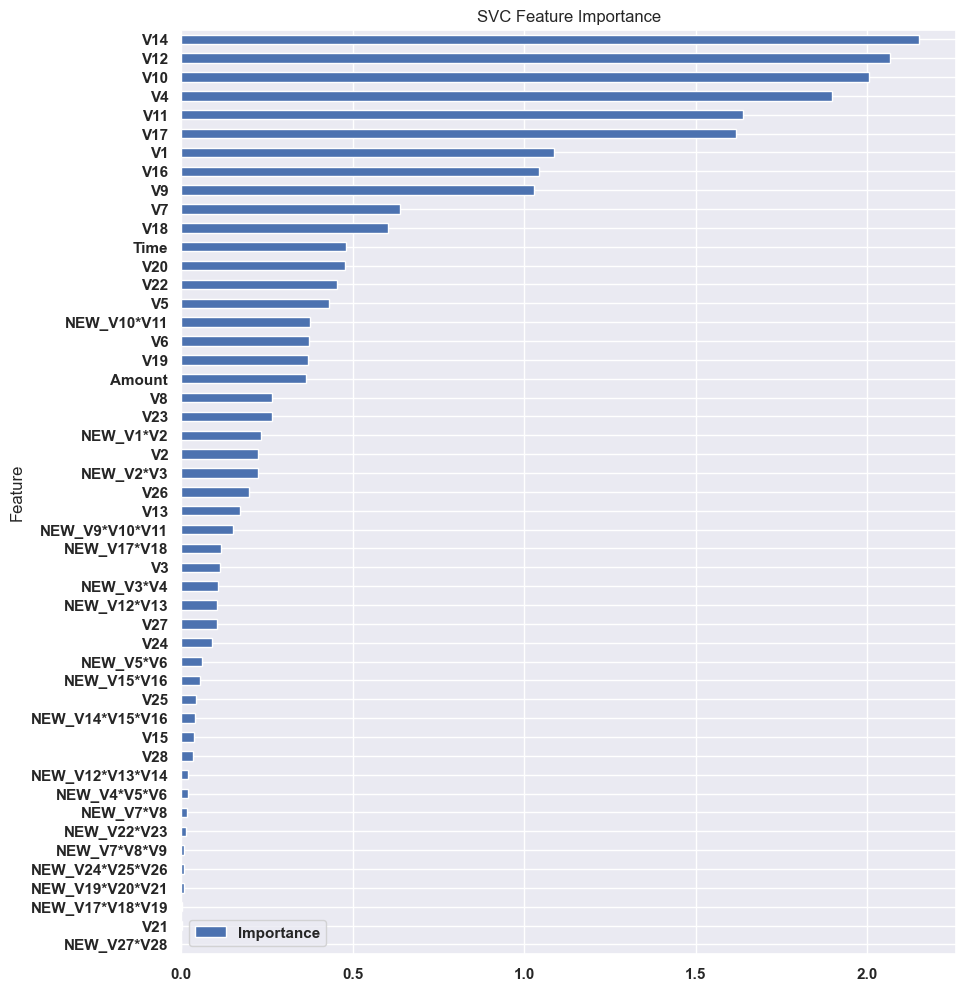

In [407]:
coefficients = svc_final.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 12), title="SVC Feature Importance");

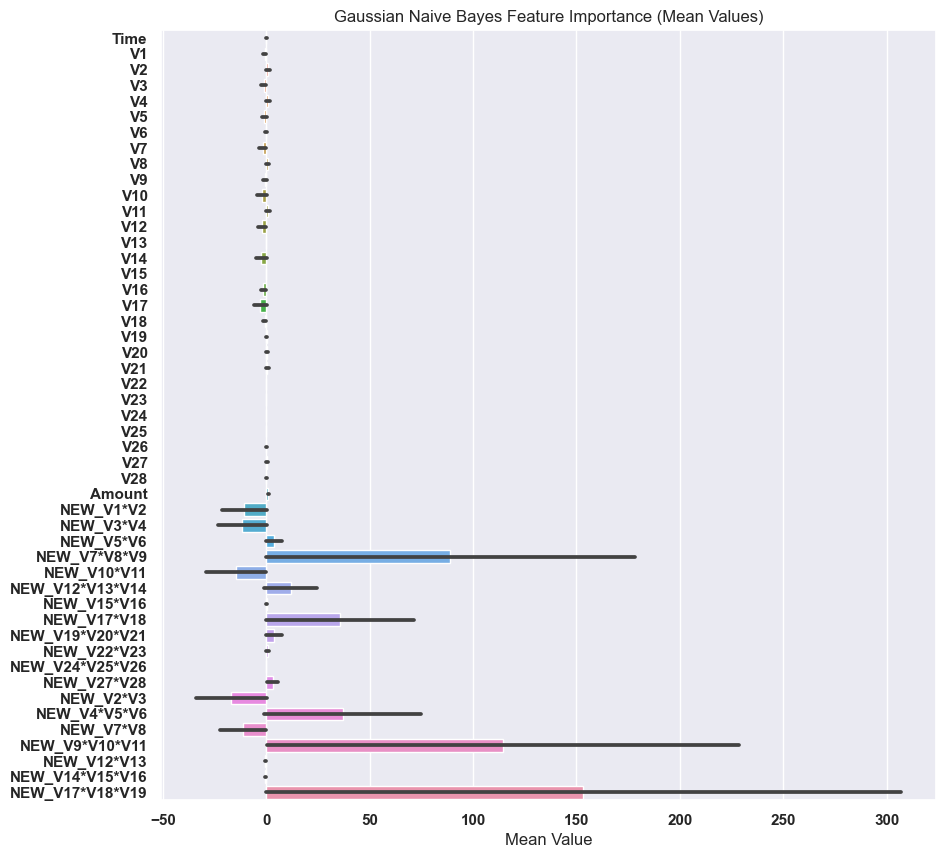

In [408]:
# Extract the mean values for each feature in each class
mean_values = nb_final.theta_

# Create a DataFrame to store mean feature values and corresponding feature names
feature_imp = pd.DataFrame(mean_values, columns=X.columns)

# Plot the feature importances
plt.figure(figsize=(10, 10))
sns.barplot(data=feature_imp, orient='h')
plt.title('Gaussian Naive Bayes Feature Importance (Mean Values)')
plt.xlabel('Mean Value')
plt.show()

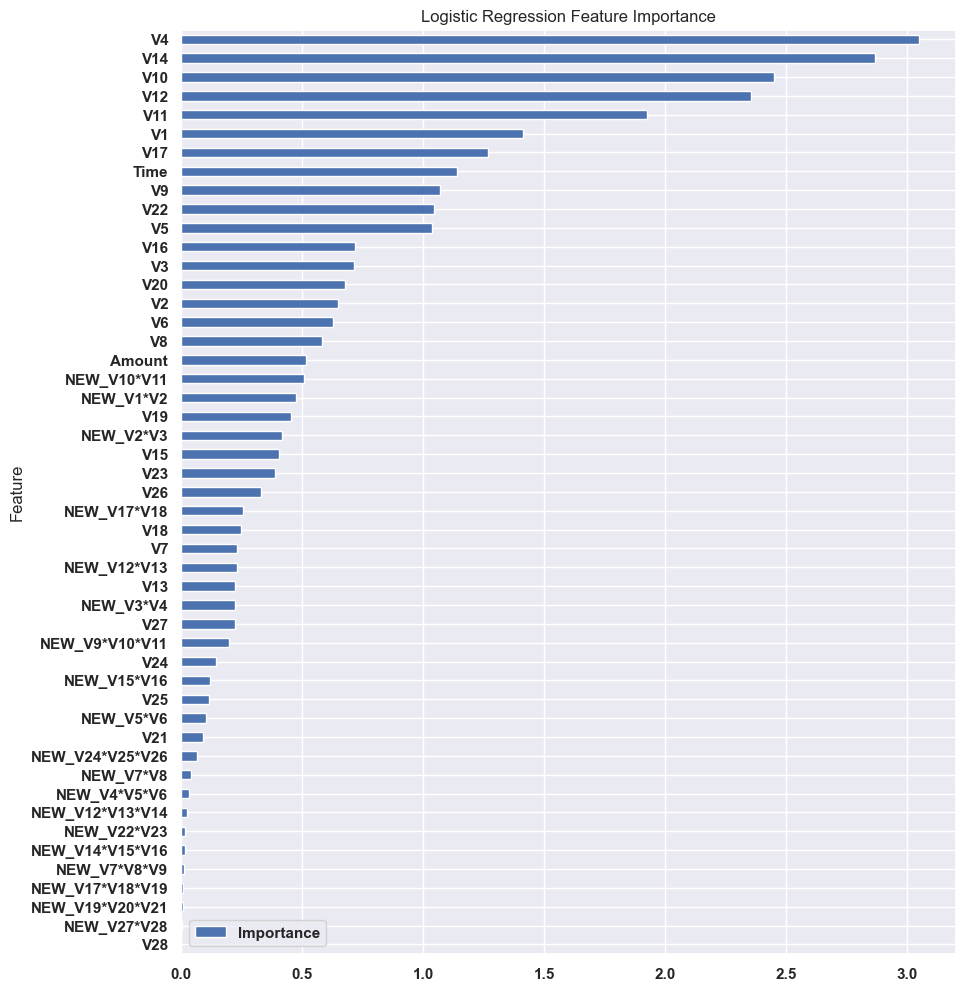

In [409]:
coefficients = logistic_regression_final.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 12), title="Logistic Regression Feature Importance");

# Visualisation

In [410]:
print(mlpc_cv_results["test_accuracy"])

[0.98746867 0.99498747 0.96741855 0.97493734 0.97994987 0.98245614
 0.97744361 0.98496241 0.97738693 0.98241206]


In [411]:
print(mlpc_results)



{'0': {'precision': 0.9947089947089947, 'recall': 0.9842931937172775, 'f1-score': 0.9894736842105263, 'support': 191.0}, '1': {'precision': 0.9857142857142858, 'recall': 0.9951923076923077, 'f1-score': 0.9904306220095694, 'support': 208.0}, 'accuracy': 0.9899749373433584, 'macro avg': {'precision': 0.9902116402116402, 'recall': 0.9897427507047927, 'f1-score': 0.9899521531100479, 'support': 399.0}, 'weighted avg': {'precision': 0.9900200236039834, 'recall': 0.9899749373433584, 'f1-score': 0.9899725390030099, 'support': 399.0}}


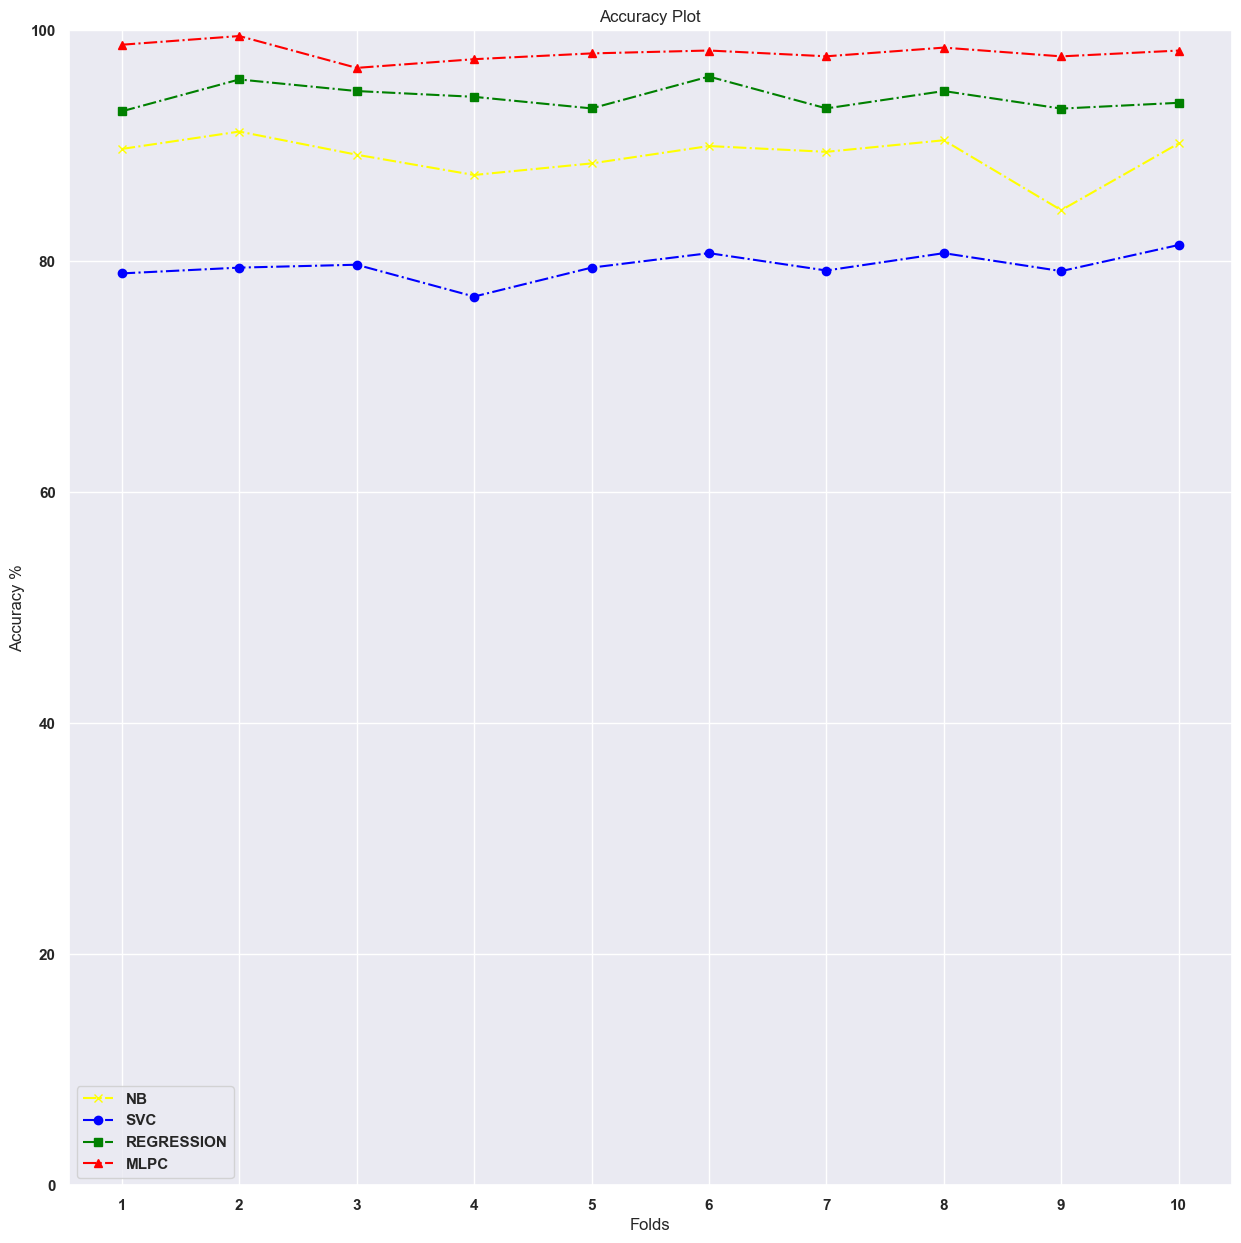

In [412]:
import matplotlib.pyplot as plt
folds = np.arange(1,11)


plt.figure()
plt.xticks(folds)
# Plotting the data
plt.plot(folds, nb_cv_results["test_accuracy"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
plt.plot(folds, svc_cv_results["test_accuracy"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
plt.plot(folds, regression_cv_results["test_accuracy"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
plt.plot(folds, mlpc_cv_results["test_accuracy"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
plt.xlabel('Folds')
plt.ylabel('Accuracy %')
plt.title('Accuracy Plot')
plt.ylim(0,100)


plt.legend()
plt.show()

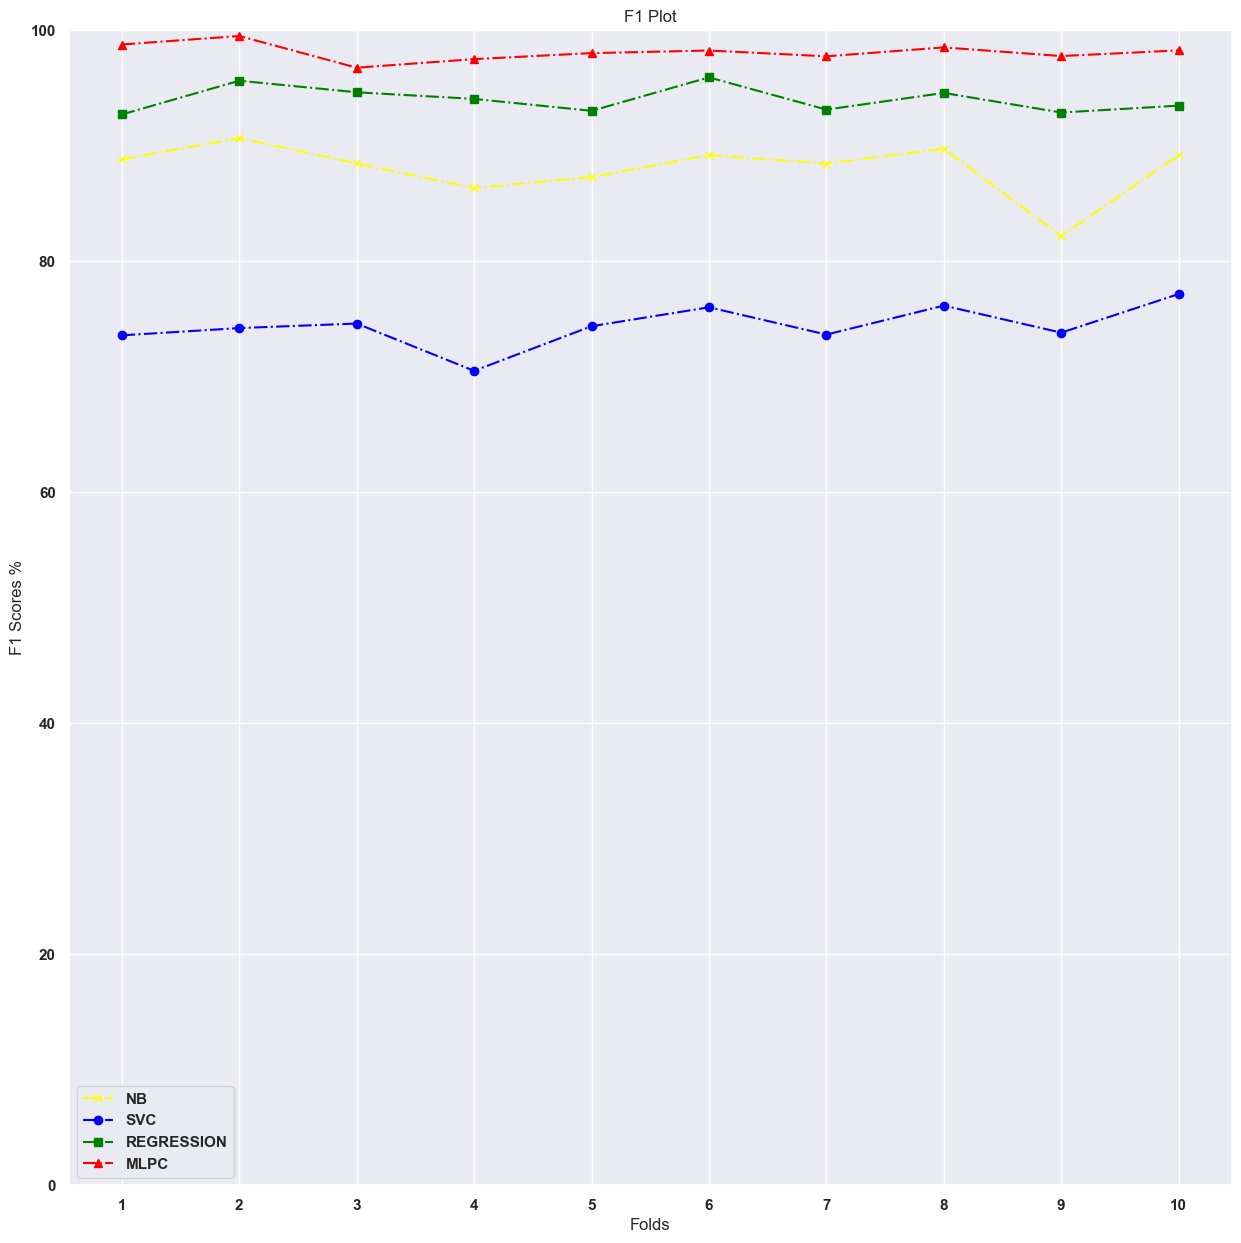

In [413]:
folds = np.arange(1,11)

plt.xticks(folds)
# Plotting the data
plt.plot(folds, nb_cv_results["test_f1"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
plt.plot(folds, svc_cv_results["test_f1"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
plt.plot(folds, regression_cv_results["test_f1"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
plt.plot(folds, mlpc_cv_results["test_f1"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
plt.xlabel('Folds')
plt.ylabel('F1 Scores %')
plt.title('F1 Plot')
plt.ylim(0,100)


plt.legend()
plt.show()

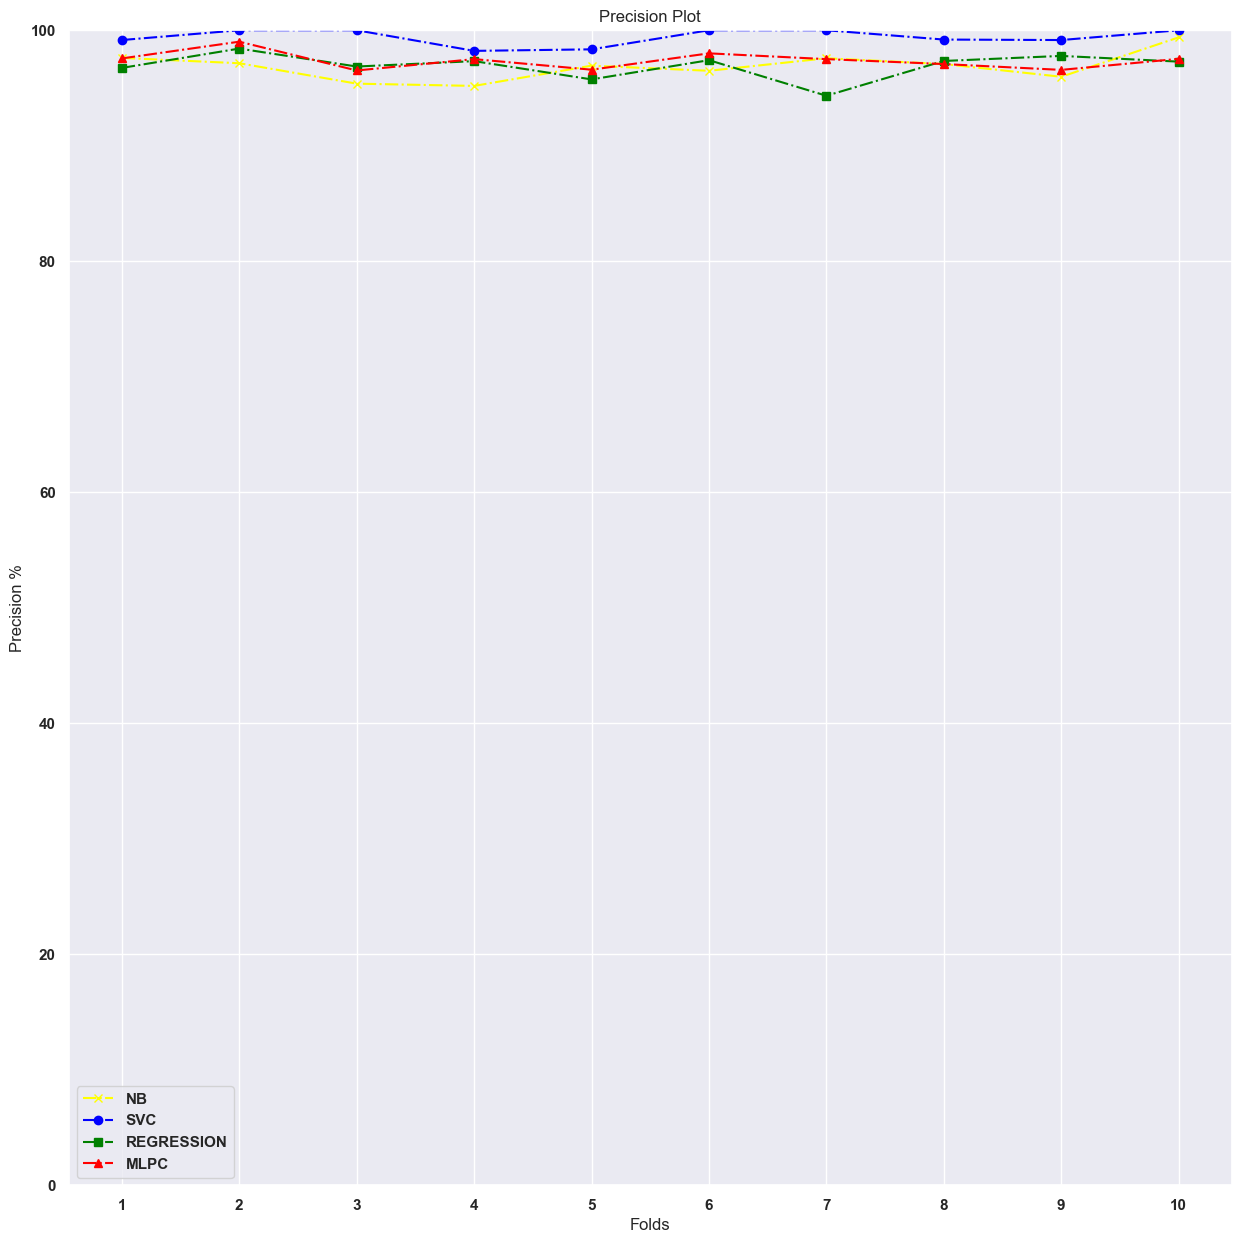

In [414]:
folds = np.arange(1,11)

plt.figure()
plt.xticks(folds)
# Plotting the data

plt.plot(folds, nb_cv_results["test_precision"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
plt.plot(folds, svc_cv_results["test_precision"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
plt.plot(folds, regression_cv_results["test_precision"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
plt.plot(folds, mlpc_cv_results["test_precision"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
plt.xlabel('Folds')
plt.ylabel('Precision %')
plt.title('Precision Plot')
plt.ylim(0,100)


plt.legend()
plt.show()

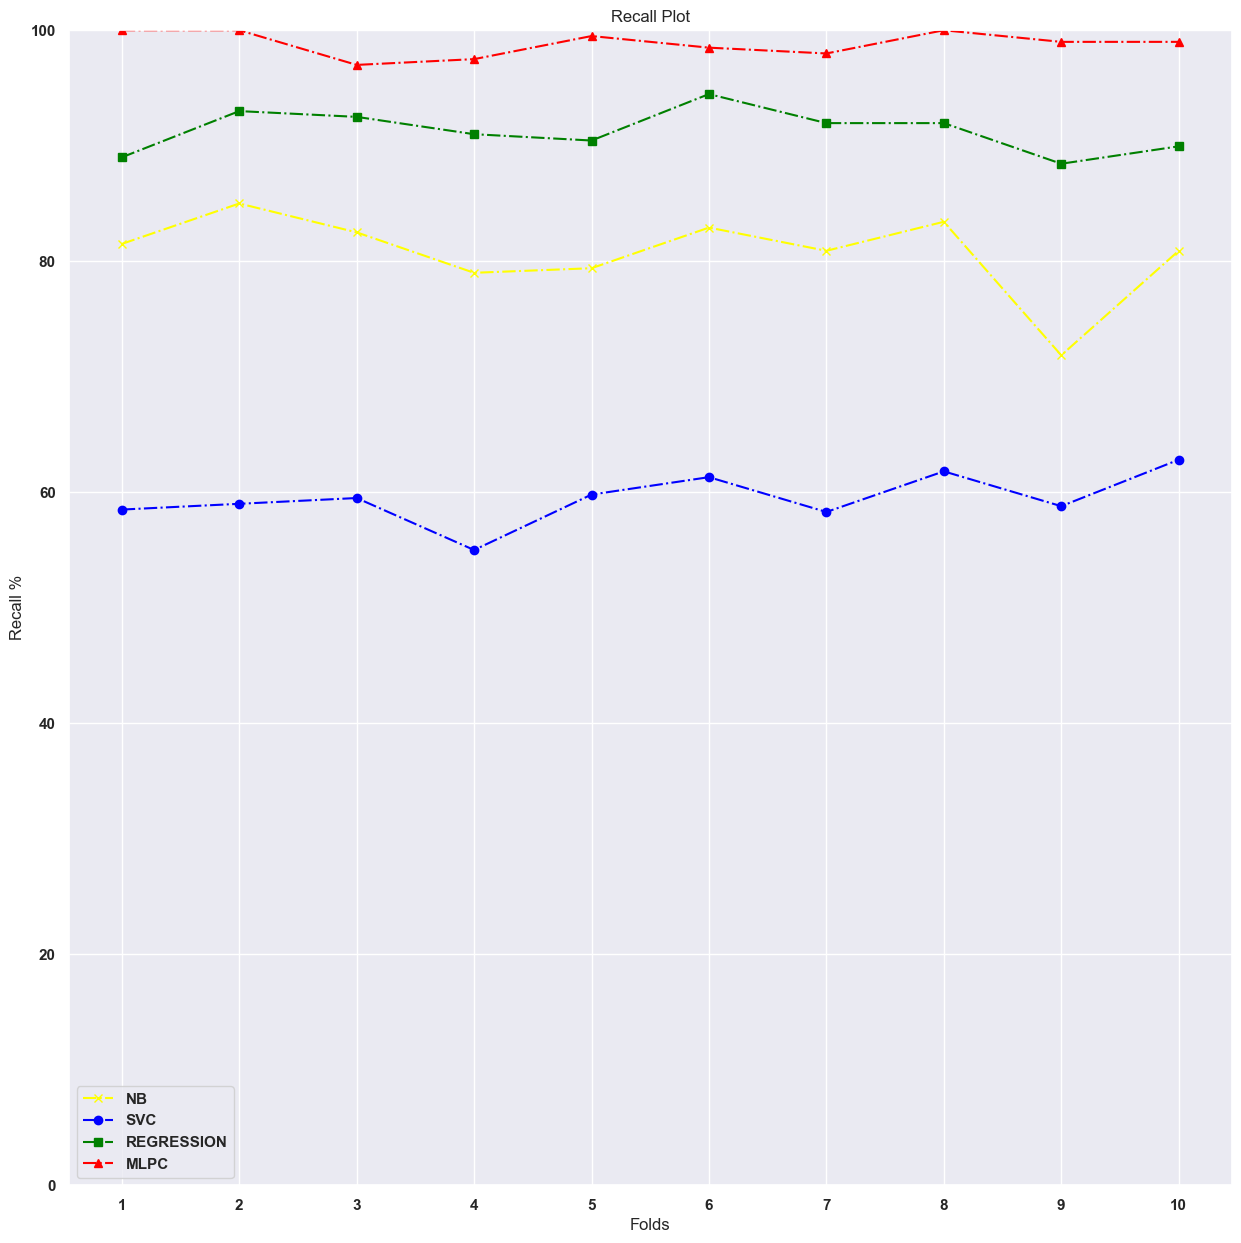

In [415]:
folds = np.arange(1,11)

plt.figure()
plt.xticks(folds)
# Plotting the data
plt.plot(folds, nb_cv_results["test_recall"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
plt.plot(folds, svc_cv_results["test_recall"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
plt.plot(folds, regression_cv_results["test_recall"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
plt.plot(folds, mlpc_cv_results["test_recall"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
plt.xlabel('Folds')
plt.ylabel('Recall %')
plt.title('Recall Plot')
plt.ylim(0,100)


plt.legend()
plt.show()

C:\Users\siyar\AppData\Local\Temp\ipykernel_21980\2187698590.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


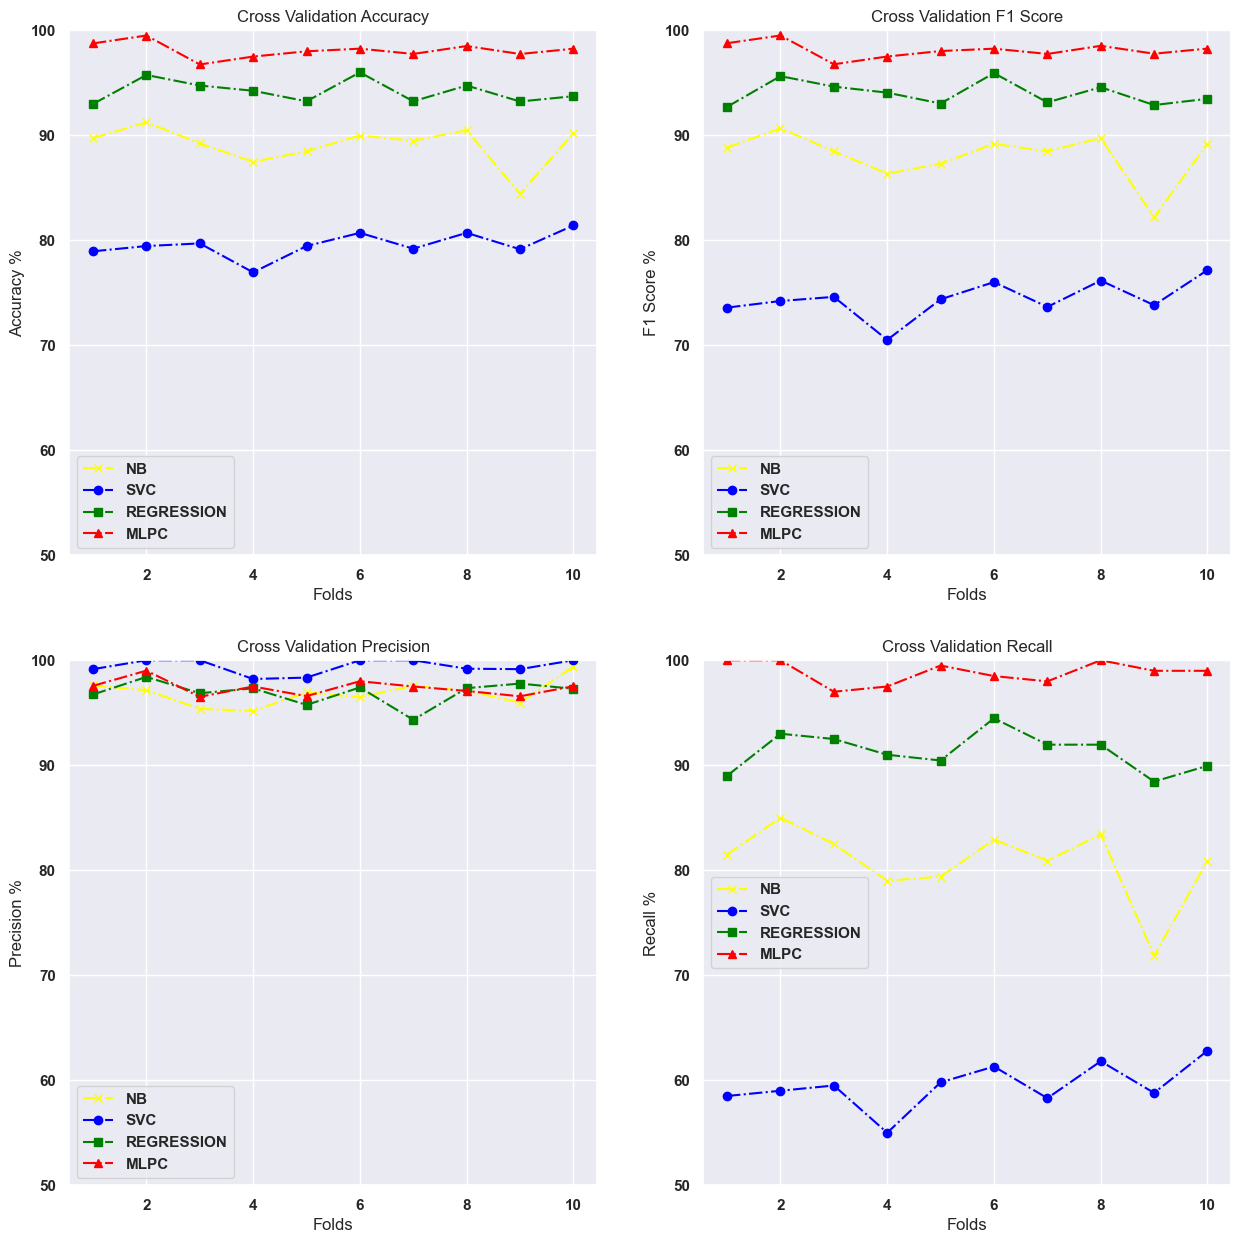

In [416]:
fig2, axs2 = plt.subplots(2, 2)



# Plotting the data

axs2[0, 0].plot(folds, nb_cv_results["test_accuracy"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
axs2[0, 0].plot(folds, svc_cv_results["test_accuracy"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
axs2[0, 0].plot(folds, regression_cv_results["test_accuracy"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
axs2[0, 0].plot(folds, mlpc_cv_results["test_accuracy"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
axs2[0, 0].set_xlabel('Folds')
axs2[0, 0].set_ylabel('Accuracy %')
axs2[0, 0].set_title('Cross Validation Accuracy')
axs2[0, 0].set_ylim(50,100)


axs2[0, 0].legend()


axs2[0, 1].plot(folds, nb_cv_results["test_f1"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
axs2[0, 1].plot(folds, svc_cv_results["test_f1"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
axs2[0, 1].plot(folds, regression_cv_results["test_f1"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
axs2[0, 1].plot(folds, mlpc_cv_results["test_f1"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
axs2[0, 1].set_xlabel('Folds')
axs2[0, 1].set_ylabel('F1 Score %')
axs2[0, 1].set_title('Cross Validation F1 Score')
axs2[0, 1].set_ylim(50,100)


axs2[0, 1].legend()

axs2[1, 0].plot(folds, nb_cv_results["test_precision"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
axs2[1, 0].plot(folds, svc_cv_results["test_precision"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
axs2[1, 0].plot(folds, regression_cv_results["test_precision"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
axs2[1, 0].plot(folds, mlpc_cv_results["test_precision"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
axs2[1, 0].set_xlabel('Folds')
axs2[1, 0].set_ylabel('Precision %')
axs2[1, 0].set_title('Cross Validation Precision')
axs2[1, 0].set_ylim(50,100)


axs2[1, 0].legend()


axs2[1, 1].plot(folds, nb_cv_results["test_recall"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
axs2[1, 1].plot(folds, svc_cv_results["test_recall"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
axs2[1, 1].plot(folds, regression_cv_results["test_recall"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
axs2[1, 1].plot(folds, mlpc_cv_results["test_recall"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
axs2[1, 1].set_xlabel('Folds')
axs2[1, 1].set_ylabel('Recall %')
axs2[1, 1].set_title('Cross Validation Recall')

axs2[1, 1].set_ylim(50,100)
axs2[1, 1].legend()
fig2.show()



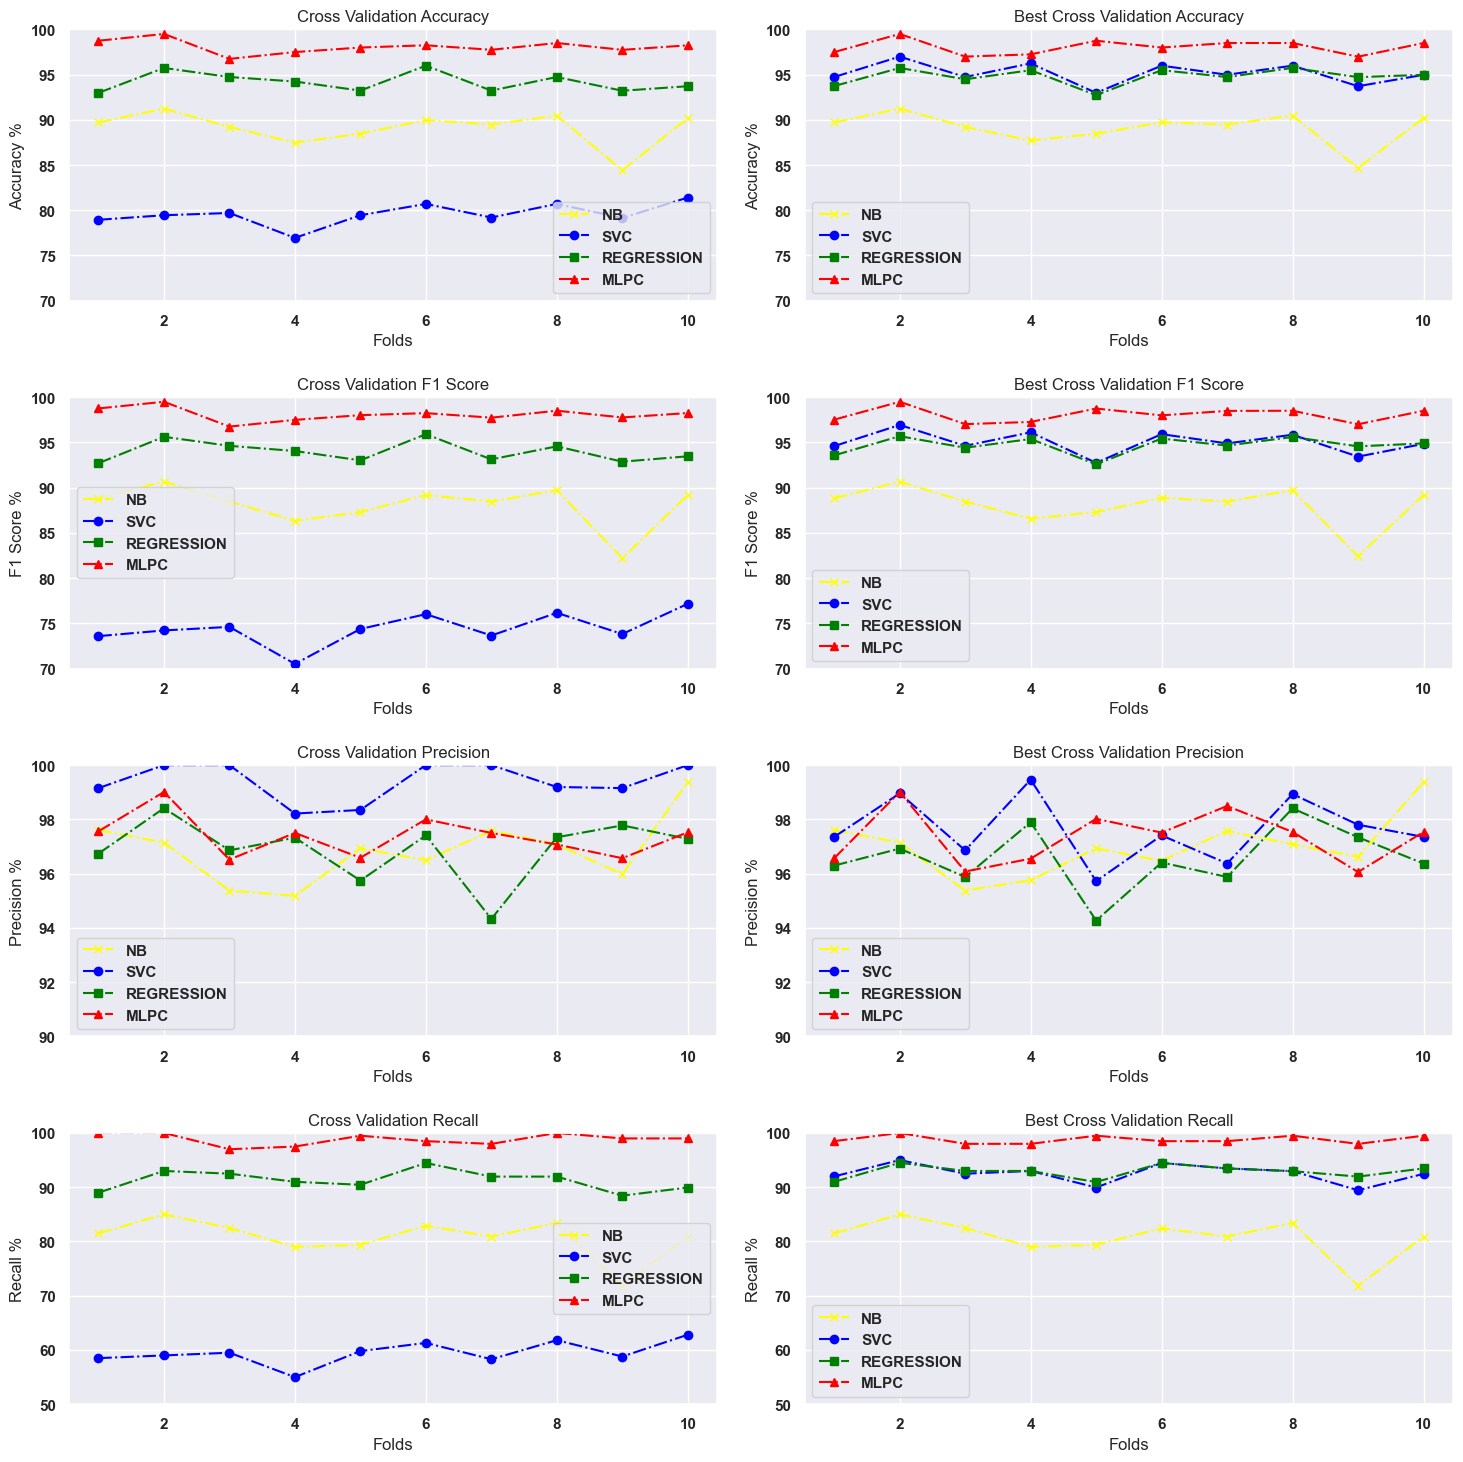

In [417]:
fig, axs = plt.subplots(4, 2)


# Plotting the data

axs[0, 0].plot(folds, nb_cv_results["test_accuracy"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
axs[0, 0].plot(folds, svc_cv_results["test_accuracy"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
axs[0, 0].plot(folds, regression_cv_results["test_accuracy"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
axs[0, 0].plot(folds, mlpc_cv_results["test_accuracy"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
axs[0, 0].set_xlabel('Folds')
axs[0, 0].set_ylabel('Accuracy %')
axs[0, 0].set_ylim(70,100)
axs[0, 0].set_title('Cross Validation Accuracy')


axs[0, 0].legend()

axs[1, 0].plot(folds, nb_cv_results["test_f1"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
axs[1, 0].plot(folds, svc_cv_results["test_f1"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
axs[1, 0].plot(folds, regression_cv_results["test_f1"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
axs[1, 0].plot(folds, mlpc_cv_results["test_f1"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
axs[1, 0].set_xlabel('Folds')
axs[1, 0].set_ylabel('F1 Score %')
axs[1, 0].set_title('Cross Validation F1 Score')
axs[1, 0].set_ylim(70,100)


axs[1, 0].legend()


axs[2, 0].plot(folds, nb_cv_results["test_precision"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
axs[2, 0].plot(folds, svc_cv_results["test_precision"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
axs[2, 0].plot(folds, regression_cv_results["test_precision"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
axs[2, 0].plot(folds, mlpc_cv_results["test_precision"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
axs[2, 0].set_xlabel('Folds')
axs[2, 0].set_ylabel('Precision %')
axs[2, 0].set_ylim(90,100)
axs[2, 0].set_title('Cross Validation Precision')


axs[2, 0].legend()

axs[3, 0].plot(folds, nb_cv_results["test_recall"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
axs[3, 0].plot(folds, svc_cv_results["test_recall"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
axs[3, 0].plot(folds, regression_cv_results["test_recall"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
axs[3, 0].plot(folds, mlpc_cv_results["test_recall"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
axs[3, 0].set_xlabel('Folds')
axs[3, 0].set_ylabel('Recall %')
axs[3, 0].set_ylim(50,100)
axs[3, 0].set_title('Cross Validation Recall')
axs[3, 0].legend()

# Plotting the data
axs[0, 1].plot(folds, nb_best_cv_results["test_accuracy"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
axs[0, 1].plot(folds, svc_best_cv_results["test_accuracy"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
axs[0, 1].plot(folds, logistic_regression_best_cv_results["test_accuracy"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
axs[0, 1].plot(folds, mlpc_best_cv_results["test_accuracy"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
axs[0, 1].set_xlabel('Folds')
axs[0, 1].set_ylabel('Accuracy %')
axs[0, 1].set_ylim(70,100)
axs[0, 1].set_title('Best Cross Validation Accuracy')


axs[0, 1].legend()

axs[1, 1].plot(folds, nb_best_cv_results["test_f1"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
axs[1, 1].plot(folds, svc_best_cv_results["test_f1"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
axs[1, 1].plot(folds, logistic_regression_best_cv_results["test_f1"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
axs[1, 1].plot(folds, mlpc_best_cv_results["test_f1"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
axs[1, 1].set_xlabel('Folds')
axs[1, 1].set_ylabel('F1 Score %')
axs[1, 1].set_ylim(70,100)
axs[1, 1].set_title('Best Cross Validation F1 Score')


axs[1, 1].legend()

axs[2, 1].plot(folds, nb_best_cv_results["test_precision"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
axs[2, 1].plot(folds, svc_best_cv_results["test_precision"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
axs[2, 1].plot(folds, logistic_regression_best_cv_results["test_precision"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
axs[2, 1].plot(folds, mlpc_best_cv_results["test_precision"]*100, label='MLPC', linestyle='-.', marker='^', color='red')


# Adding labels and title
axs[2, 1].set_xlabel('Folds')
axs[2, 1].set_ylabel('Precision %')
axs[2, 1].set_ylim(90,100)
axs[2, 1].set_title('Best Cross Validation Precision')


axs[2, 1].legend()

axs[3, 1].plot(folds, nb_best_cv_results["test_recall"]*100, label='NB', linestyle='-.', marker='x', color='yellow')
axs[3, 1].plot(folds, svc_best_cv_results["test_recall"]*100, label='SVC', linestyle='-.', marker='o', color='blue')
axs[3, 1].plot(folds, logistic_regression_best_cv_results["test_recall"]*100, label='REGRESSION', linestyle='-.', marker='s', color='green')
axs[3, 1].plot(folds, mlpc_best_cv_results["test_recall"]*100, label='MLPC', linestyle='-.', marker='^', color='red')

# Adding labels and title
axs[3, 1].set_xlabel('Folds')
axs[3, 1].set_ylabel('Recall %')
axs[3, 1].set_ylim(50,100)
axs[3, 1].set_title('Best Cross Validation Recall')
axs[3, 1].legend()


fig.tight_layout()

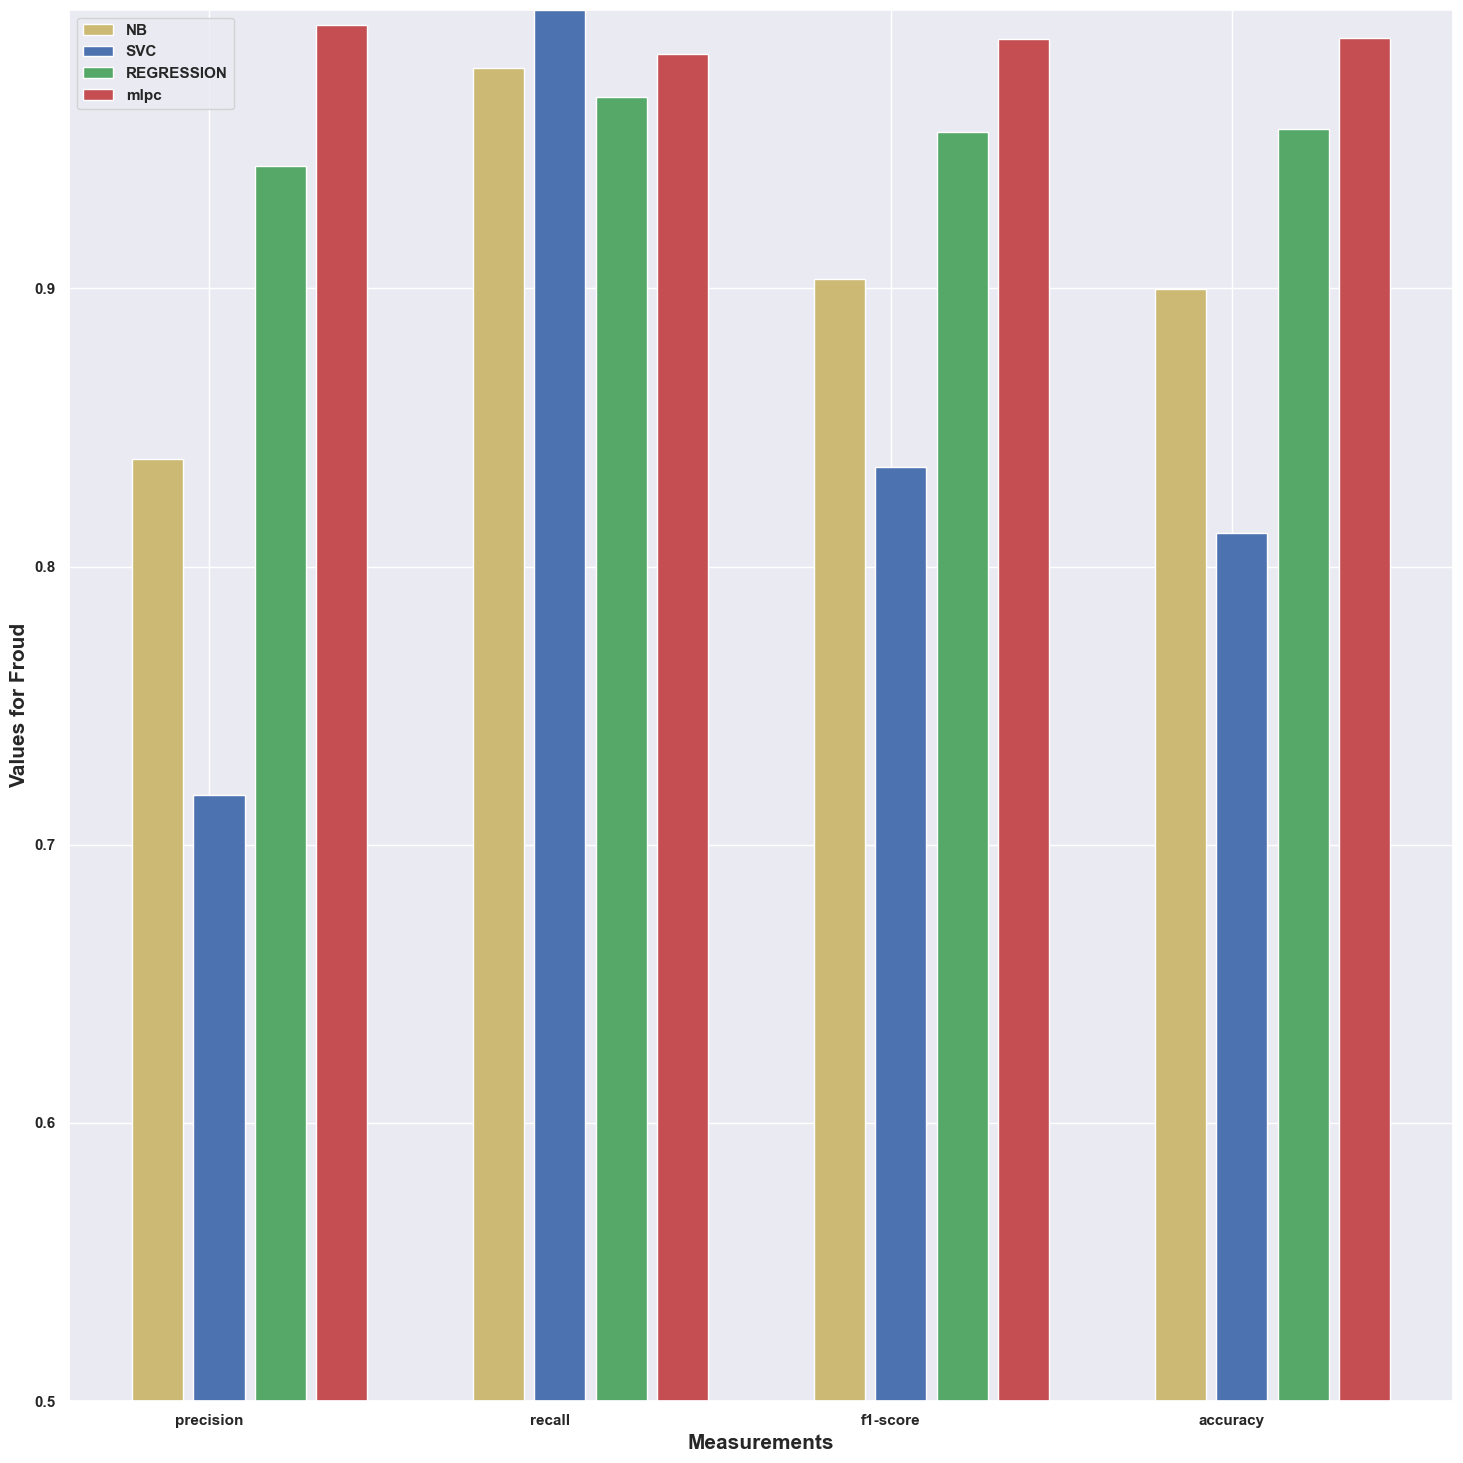

In [418]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.15
fig = plt.subplots()

svc = []
nb = []
rgr = []
mlpc = []

for x in svc_results["0"].values():
  if x <= 1:
   svc.append(x)

svc.append(svc_results["accuracy"])

for y in nb_results["0"].values():
  if y <= 1:
   nb.append(y)

nb.append(nb_results["accuracy"])

for k in regression_results["0"].values():
  if k <= 1:
   rgr.append(k)

rgr.append(regression_results["accuracy"])

for l in mlpc_results["0"].values():
  if l <= 1:
   mlpc.append(l)

mlpc.append(mlpc_results["accuracy"])


# Set position of bar on X axis
br1 = np.arange(4)
br2 = [x + barWidth + 0.03 for x in br1]
br3 = [x + barWidth + 0.03 for x in br2]
br4 = [x + barWidth + 0.03 for x in br3]

# Make the plot
plt.bar(br1, nb, color ='y', width = barWidth,
		label ='NB')
plt.bar(br2, svc, color ='b', width = barWidth,
		label ='SVC')
plt.bar(br3, rgr, color ='g', width = barWidth,
		label ='REGRESSION')
plt.bar(br4, mlpc, color ='r', width = barWidth,
		label ='mlpc')


# Adding Xticks
plt.xlabel('Measurements', fontweight ='bold', fontsize = 15)
plt.ylabel('Values for Froud', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(4)],
		['precision', 'recall', 'f1-score', 'accuracy'])
plt.yticks(np.arange(0.5,1,0.1))
plt.ylim(0.5,1)

plt.tight_layout()
plt.legend()
plt.show()


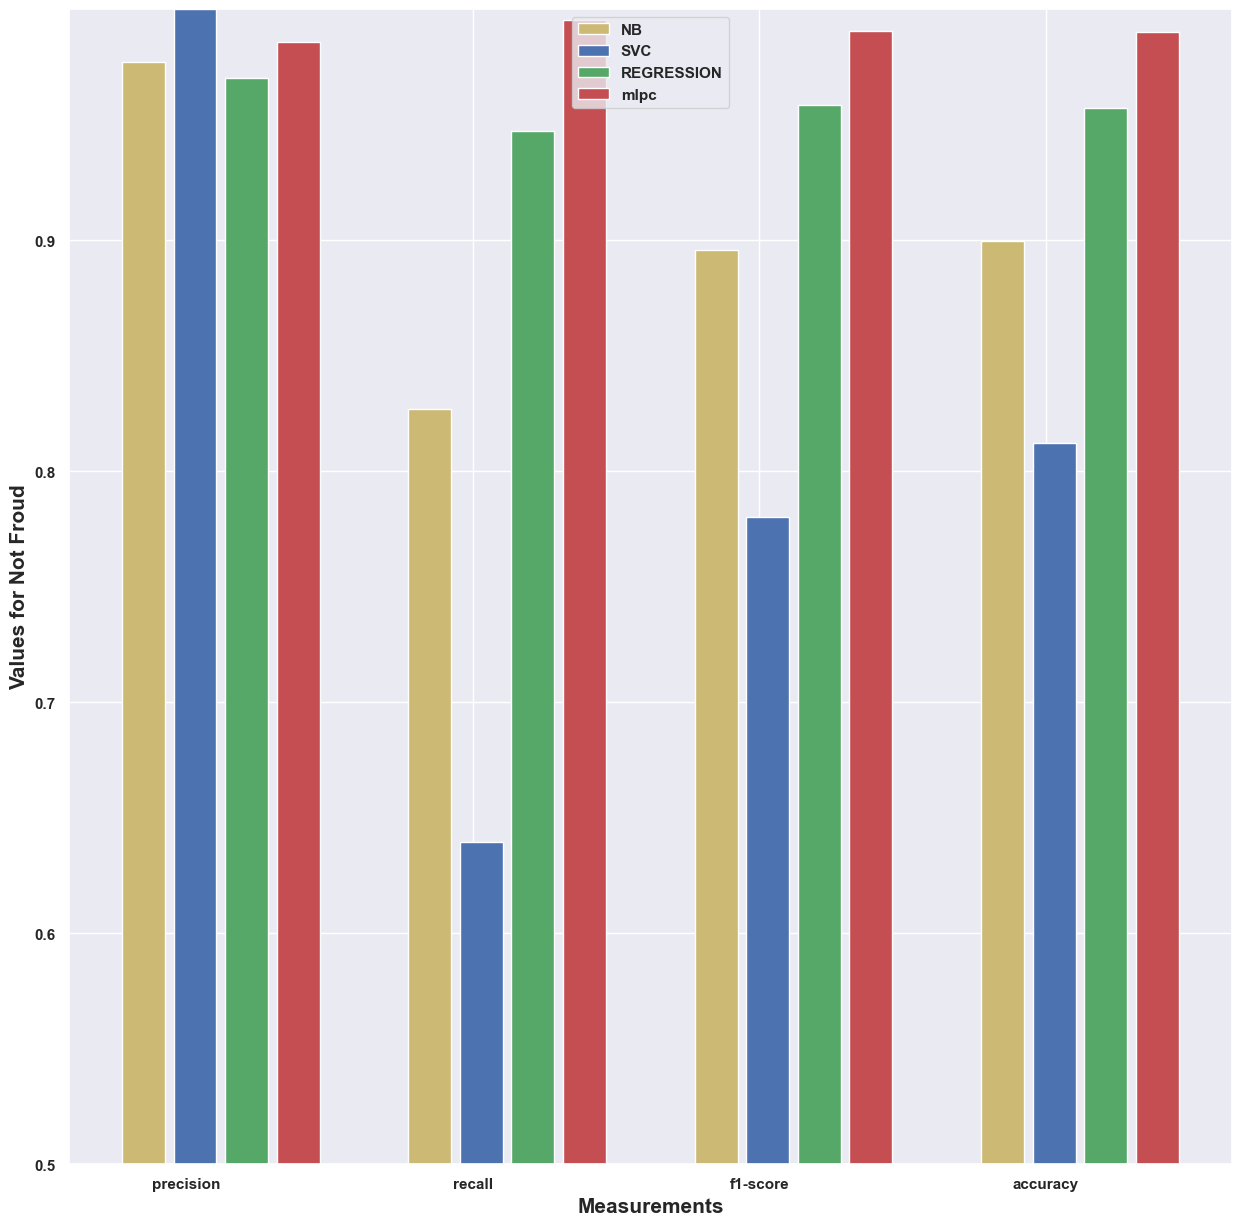

In [419]:
import numpy as np
import matplotlib.pyplot as plt
# set width of bar
barWidth = 0.15
fig = plt.subplots()

svc = []
nb = []
rgr = []
mlpc = []

for x in svc_results["1"].values():
  if x <= 1:
   svc.append(x)

svc.append(svc_results["accuracy"])

for y in nb_results["1"].values():
  if y <= 1:
   nb.append(y)

nb.append(nb_results["accuracy"])

for k in regression_results["1"].values():
  if k <= 1:
   rgr.append(k)

rgr.append(regression_results["accuracy"])

for l in mlpc_results["1"].values():
  if l <= 1:
   mlpc.append(l)

mlpc.append(mlpc_results["accuracy"])


# Set position of bar on X axis
br1 = np.arange(4)
br2 = [x + barWidth + 0.03 for x in br1]
br3 = [x + barWidth + 0.03 for x in br2]
br4 = [x + barWidth + 0.03 for x in br3]

# Make the plot
plt.bar(br1, nb, color ='y', width = barWidth,
		label ='NB')
plt.bar(br2, svc, color ='b', width = barWidth,
		label ='SVC')
plt.bar(br3, rgr, color ='g', width = barWidth,
		label ='REGRESSION')
plt.bar(br4, mlpc, color ='r', width = barWidth,
		label ='mlpc')


# Adding Xticks
plt.xlabel('Measurements', fontweight ='bold', fontsize = 15)
plt.ylabel('Values for Not Froud', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(4)],
		['precision', 'recall', 'f1-score', 'accuracy'])
plt.yticks(np.arange(0.5,1,0.1))
plt.ylim(0.5,1)


plt.legend()
plt.show()


In [420]:
svc_results["1"].values()

dict_values([1.0, 0.6394230769230769, 0.7800586510263929, 208.0])

In [421]:
svc_results["0"].values()

dict_values([0.7180451127819549, 1.0, 0.8358862144420132, 191.0])